### Using KNN and autoencoders for dimensity reduction for market segmentation that will help makreting department create tailored ad for each segments

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
marketing_df = pd.read_csv('Marketing_data.csv')
marketing_df
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
marketing_df.info()
# 18 features with 8950 points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
marketing_df.describe()
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
marketing_df[marketing_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### Data exploration and cleaning

<Axes: >

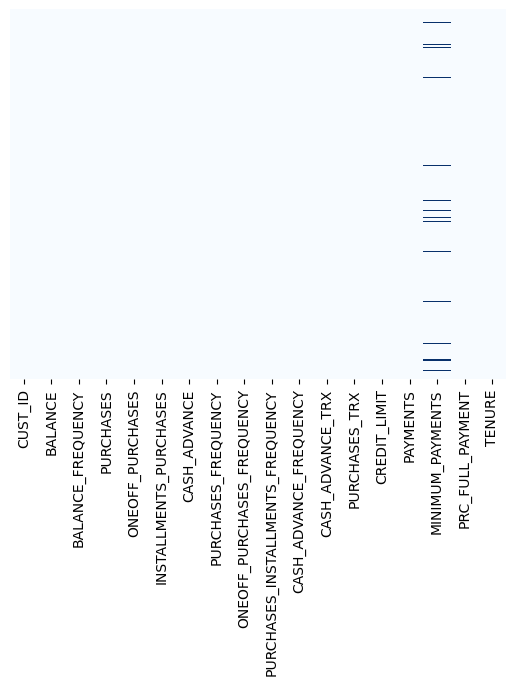

In [6]:
#searching for mising data

sns.heatmap(marketing_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [7]:
marketing_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Filling missing data with average of the variable
marketing_df.loc[(marketing_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = marketing_df['MINIMUM_PAYMENTS'].mean()
marketing_df.loc[(marketing_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = marketing_df['CREDIT_LIMIT'].mean() 

In [9]:
marketing_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
#searching for duplicate data

marketing_df.duplicated().sum()

0

In [11]:
#dropping customer id column
marketing_df.drop('CUST_ID', axis = 1, inplace = True)
marketing_df.shape

(8950, 17)

#### Visualising the data

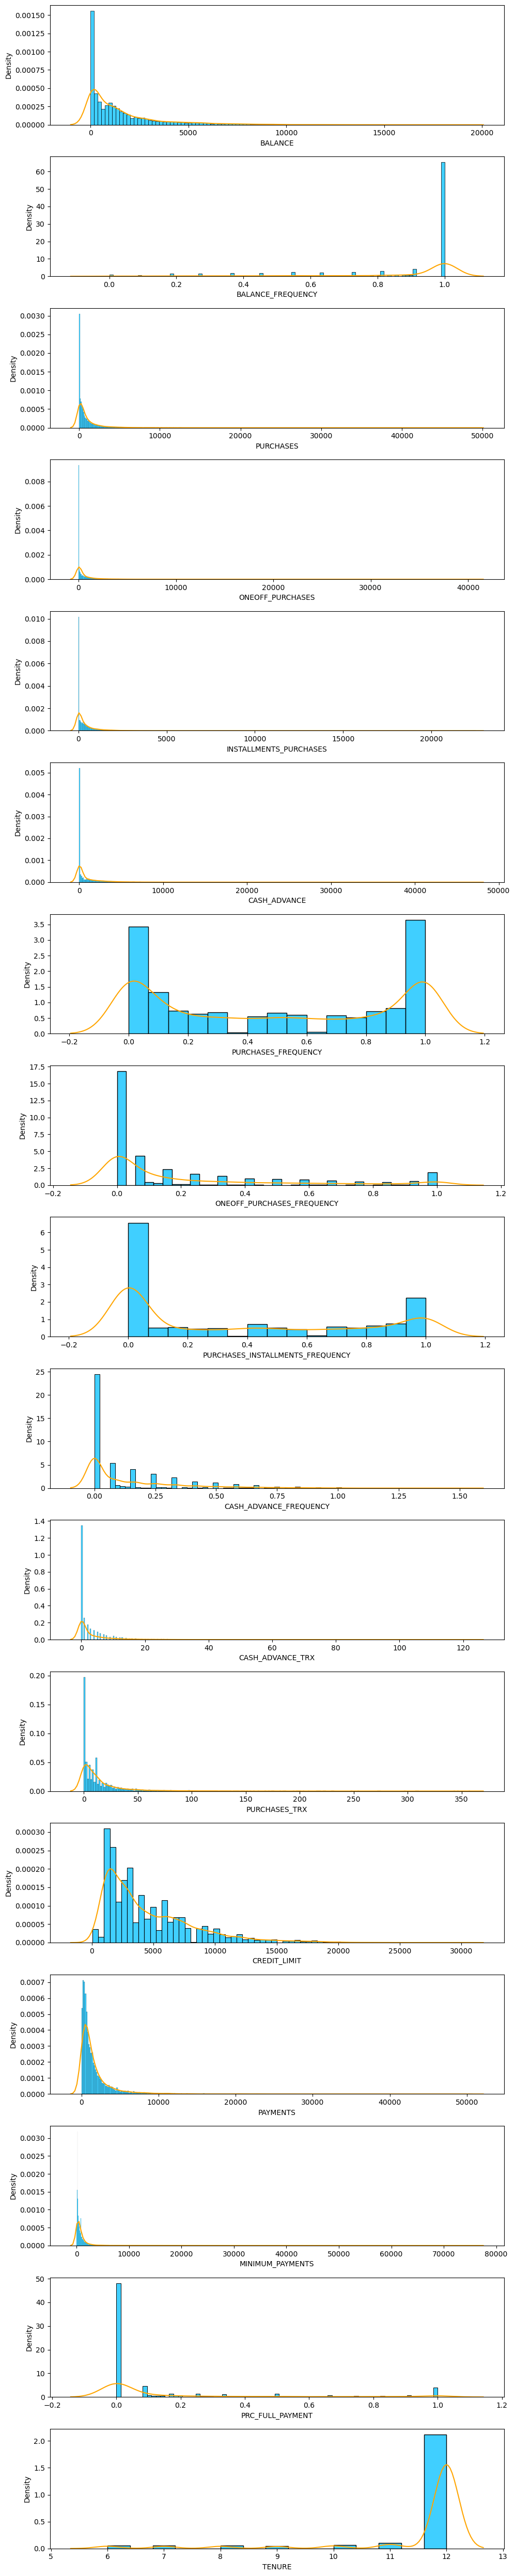

In [12]:
plt.figure(figsize = (10,50))
for n in range (0, (len(marketing_df.columns))):
    plt.subplot(17, 1, n+1)
    sns.histplot(data = marketing_df, x = marketing_df.columns[n], stat = 'density', color = 'deepskyblue')
    sns.kdeplot(data = marketing_df, x = marketing_df.columns[n], color = 'orange')
plt.tight_layout()

<Axes: >

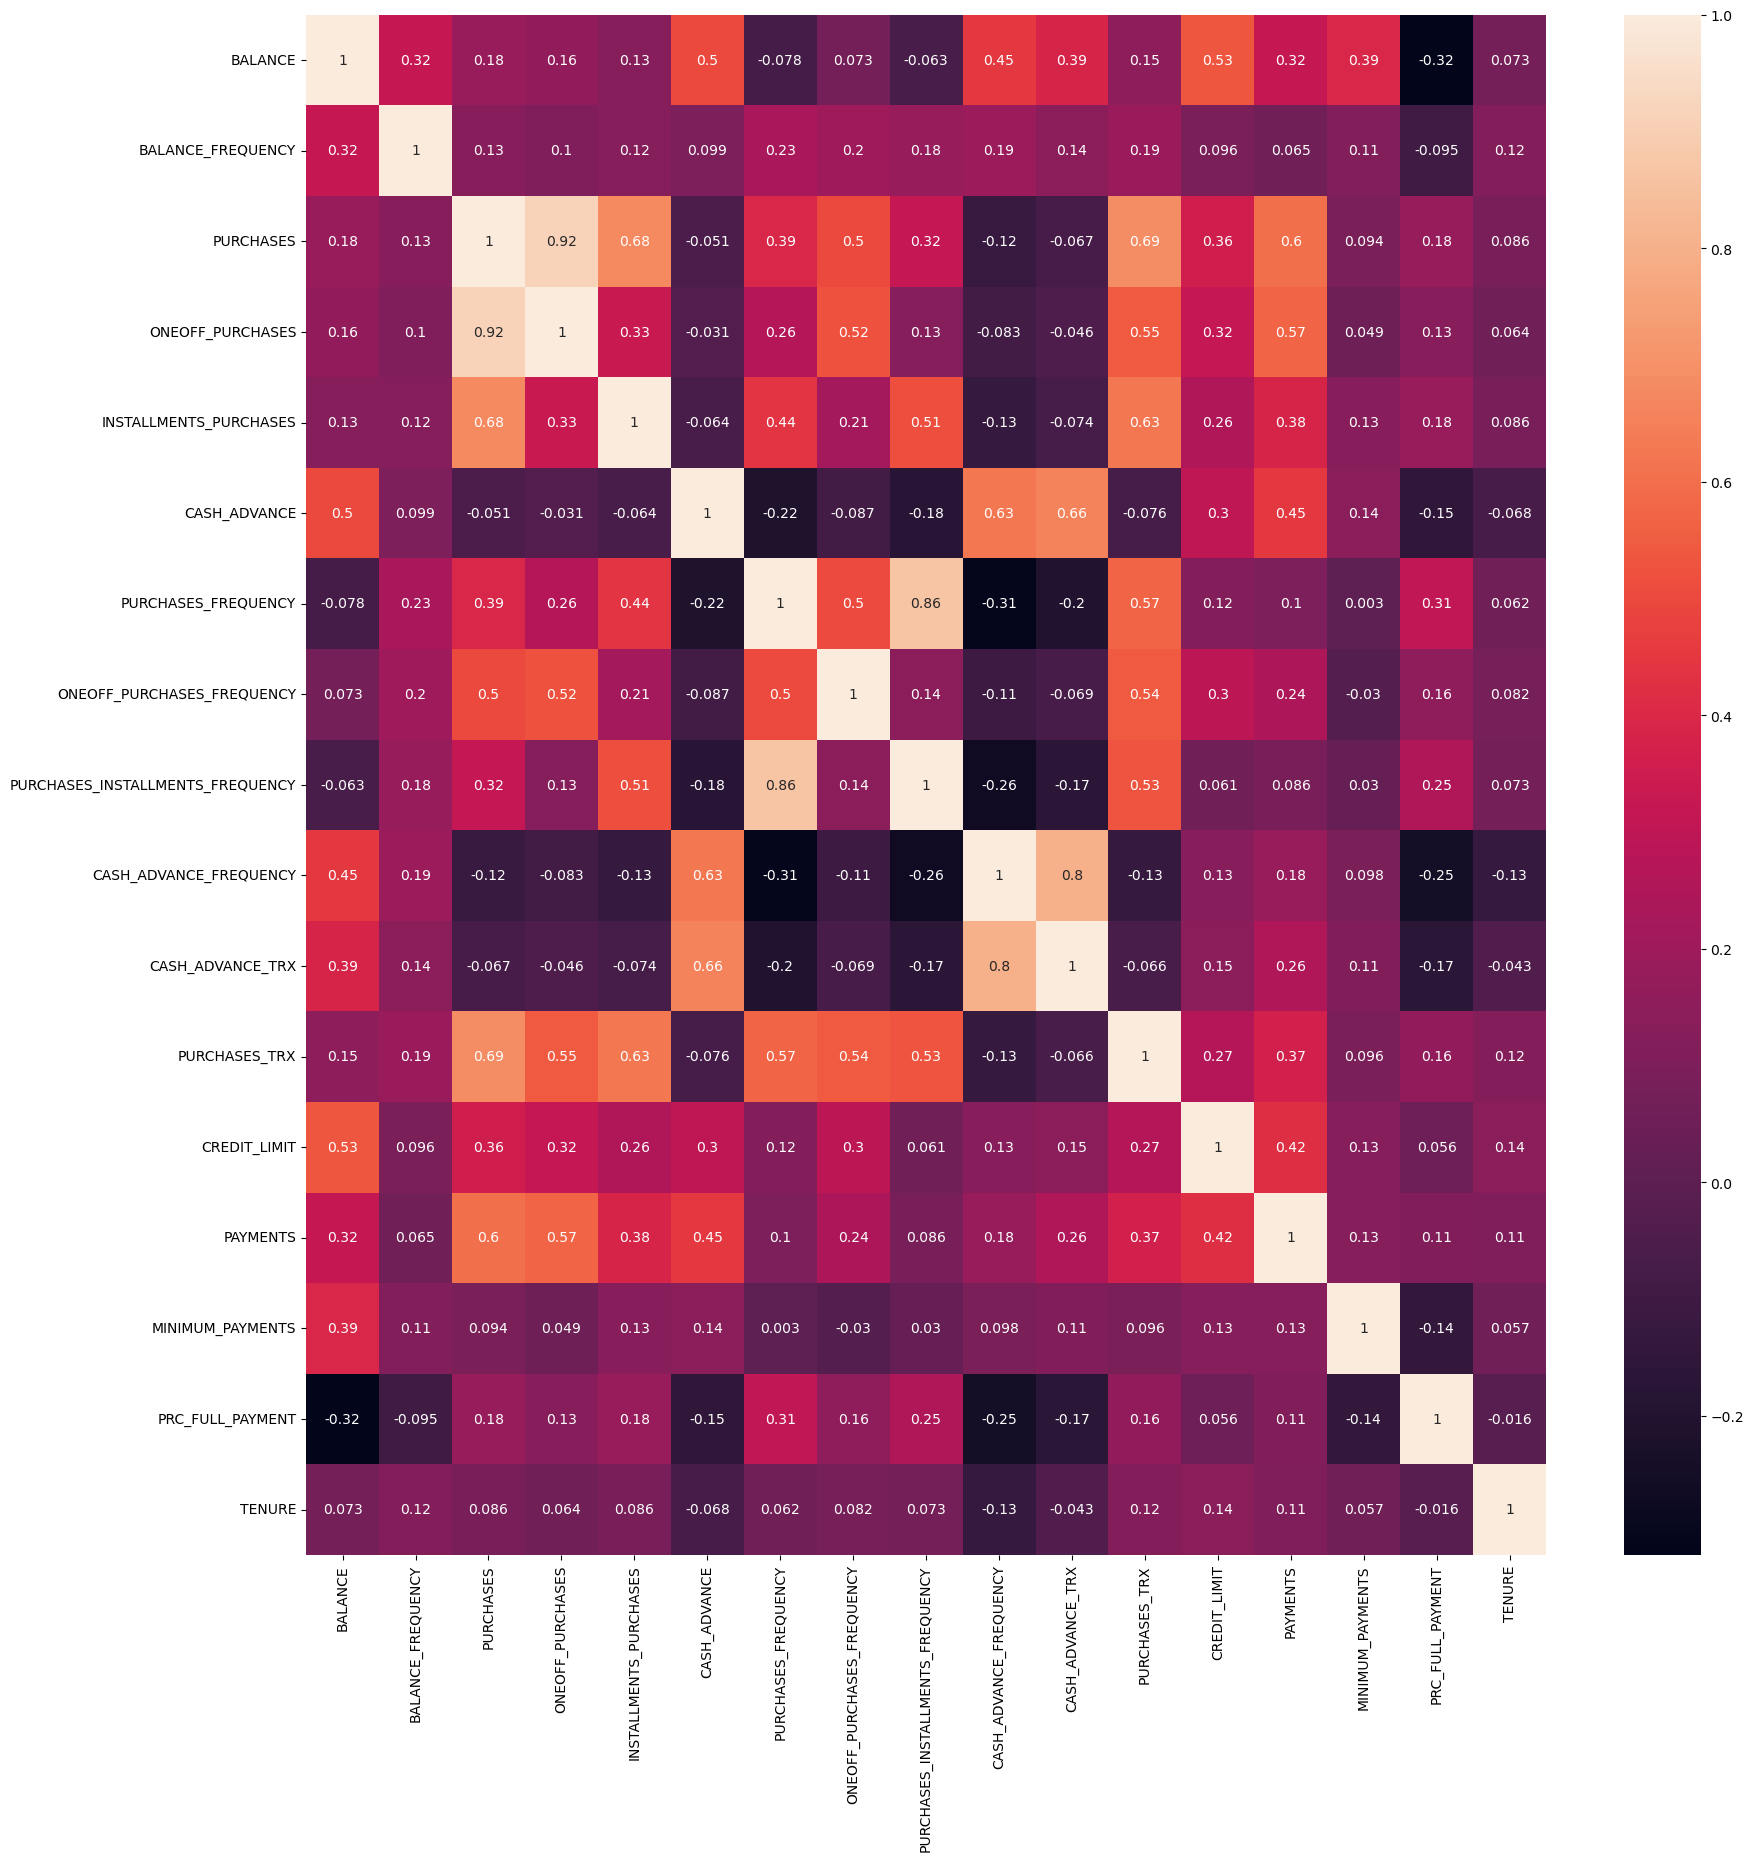

In [13]:
correlation = marketing_df.corr()

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlation, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


#### Finding optimal numbers of cluster

In [14]:
scaler = StandardScaler()
marketing_df_scaled = scaler.fit_transform(marketing_df)

In [15]:
wcss = []

for n in range(1, 20):
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(marketing_df_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\iamni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamni\anaconda3\lib\site-packages\sklearn\clust

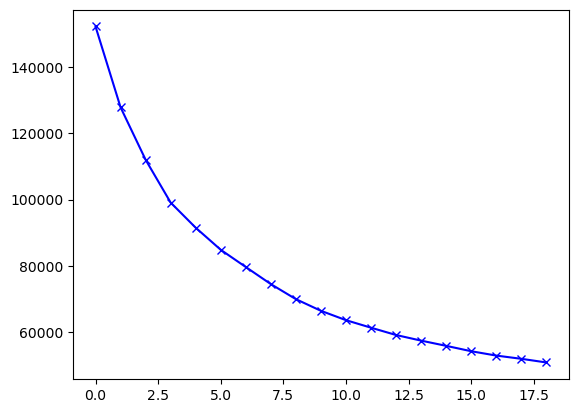

In [16]:
plt.plot(wcss, 'bx-')

In [17]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(marketing_df_scaled)
labels = kmeans.labels_ # Labels associated to each data point


C:\Users\iamni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns = [marketing_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.579357,0.373340,-0.229004,-0.161626,-0.244607,1.959238,-0.482179,-0.208485,-0.430499,1.920450,1.862134,-0.280185,0.963398,0.749036,0.355862,-0.390332,-0.091786
1,1.018222,0.464677,2.494605,1.820826,2.553315,-0.156675,1.161066,1.575282,1.266153,-0.278703,-0.146364,3.091716,1.294520,1.446572,0.373038,0.259391,0.337847
2,-0.121130,0.394955,0.516508,0.639886,0.045547,-0.327784,0.954383,1.829159,0.178830,-0.403802,-0.327726,0.593572,0.422660,0.123473,-0.155800,0.396965,0.200908
3,-0.397666,0.306836,-0.062624,-0.257386,0.324746,-0.360495,0.979306,-0.413373,1.173728,-0.461125,-0.357026,0.135751,-0.320505,-0.243057,-0.107843,0.360321,-0.025717
4,-0.698422,-2.139069,-0.317799,-0.236491,-0.316853,-0.307211,-0.565382,-0.434424,-0.460406,-0.488194,-0.362337,-0.428004,-0.211957,-0.222292,-0.255430,0.254213,-0.153302
5,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
6,-0.013291,0.368060,-0.362819,-0.245840,-0.406145,-0.076162,-0.870584,-0.401769,-0.769441,0.146336,-0.020426,-0.490038,-0.342345,-0.266907,-0.057276,-0.454826,-0.015120
7,1.299171,0.455853,-0.051371,-0.271244,0.376157,-0.010364,-0.011158,-0.532469,0.230336,-0.241518,-0.060225,0.197608,0.006354,-0.092120,11.484621,-0.525551,0.300092


In [19]:
#  reverse scaling cluster center
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns = [marketing_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4851.773529,0.965712,513.935302,324.170923,189.872195,5087.485676,0.296829,0.140263,0.193346,0.519446,15.956522,7.745493,7999.686687,3901.528943,1693.528202,0.039549,11.394486
1,3683.817168,0.987348,6332.966694,3614.634778,2719.998583,650.317300,0.956343,0.672395,0.867639,0.079373,2.250000,91.558333,9204.444444,5920.827321,1733.555098,0.229582,11.969444
2,1312.353300,0.970832,2106.732706,1654.517607,452.255395,291.493323,0.873391,0.748131,0.435509,0.054339,1.012336,29.463816,6032.260766,2090.585024,501.120726,0.269820,11.786184
3,736.766914,0.949957,869.408447,165.228734,704.731137,222.897012,0.883393,0.079140,0.830907,0.042868,0.812384,18.084104,3328.321804,1029.518185,612.884133,0.259102,11.482902
4,110.767874,0.370545,324.222355,199.910728,124.541526,334.635885,0.263435,0.072861,0.181460,0.037452,0.776143,4.071263,3723.264054,1089.631052,268.937109,0.228068,11.312161
5,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
6,1536.809877,0.964461,228.036364,184.393396,43.795928,819.156125,0.140943,0.082602,0.058642,0.164428,3.109434,2.529331,3248.856489,960.473746,730.727374,0.020686,11.497084
7,4268.589649,0.985258,893.449189,142.227297,751.221892,957.138029,0.485872,0.043612,0.455979,0.086814,2.837838,19.621622,4517.567568,1466.465369,27628.631071,0.000000,11.918919


In [20]:
cluster_centers = scaler.inverse_transform(cluster_centers)

cluster_centers = pd.DataFrame(data = cluster_centers, columns = [marketing_df.columns])

cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.010012e+07,1.106039,1.099034e+06,5.386498e+05,1.721101e+05,1.066967e+07,0.609482,0.244301,0.441278,0.239091,112.140367,207.233826,2.911063e+07,1.129628e+07,3.947560e+06,0.165282,26.766057
1,7.669119e+06,1.111164,1.353148e+07,6.000146e+06,2.460072e+06,1.364725e+06,0.874177,0.403046,0.709259,0.151028,18.603424,2290.507605,3.349403e+07,1.714195e+07,4.040841e+06,0.220863,27.535499
2,2.733117e+06,1.107252,4.502070e+06,2.746753e+06,4.093800e+05,6.122540e+05,0.840884,0.425640,0.537520,0.146018,10.157273,747.070109,2.195233e+07,6.053772e+06,1.168705e+06,0.232632,27.290250
3,1.535083e+06,1.102307,1.858508e+06,2.748383e+05,6.376907e+05,4.684043e+05,0.844899,0.226067,0.694661,0.143723,8.792754,464.213018,1.211429e+07,2.982087e+06,1.429165e+06,0.229498,26.884381
4,2.321185e+05,0.965049,6.937093e+05,3.324033e+05,1.130324e+05,7.027260e+05,0.596080,0.224193,0.436554,0.142639,8.545429,115.906195,1.355125e+07,3.156108e+06,6.276108e+05,0.220420,26.655886
5,1.125230e+07,1.104201,5.827737e+07,3.631210e+07,4.882896e+06,3.252195e+06,0.855187,0.453750,0.650915,0.146956,20.309490,3195.275483,5.852224e+07,8.084371e+07,7.613703e+06,0.303234,27.464869
6,3.200305e+06,1.105743,4.882064e+05,3.066477e+05,4.001518e+04,1.718788e+06,0.546918,0.227100,0.387743,0.168048,24.468430,77.579543,1.182516e+07,2.782211e+06,1.703794e+06,0.159765,26.903360
7,8.886274e+06,1.110669,1.909871e+06,2.366606e+05,6.797317e+05,2.008142e+06,0.685355,0.215468,0.545655,0.152517,22.614986,502.429968,1.644125e+07,4.247007e+06,6.438822e+07,0.153715,27.467883


In [21]:
marketing_df_clusters = pd.concat([marketing_df, pd.DataFrame({'CLUSTERS': labels})], axis =1)
marketing_df_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


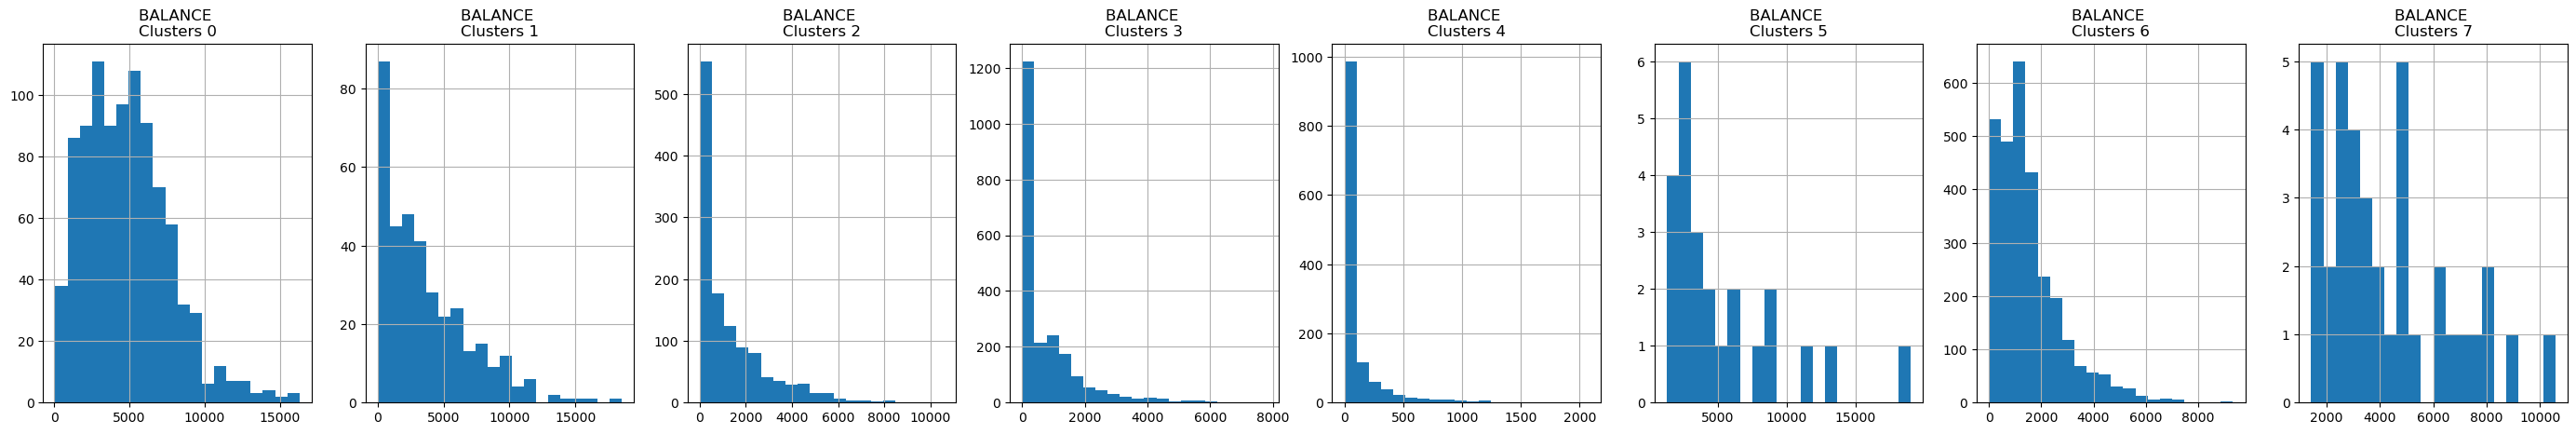

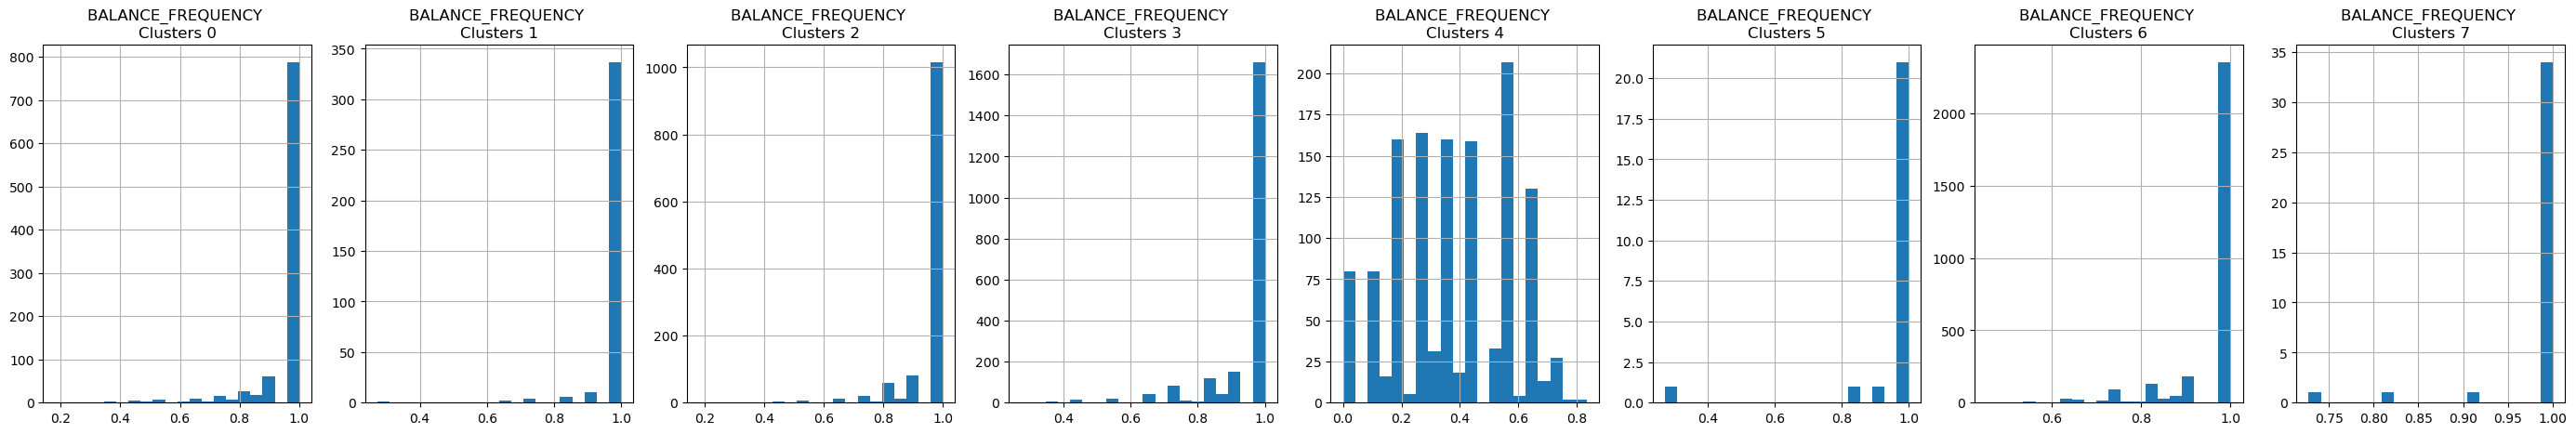

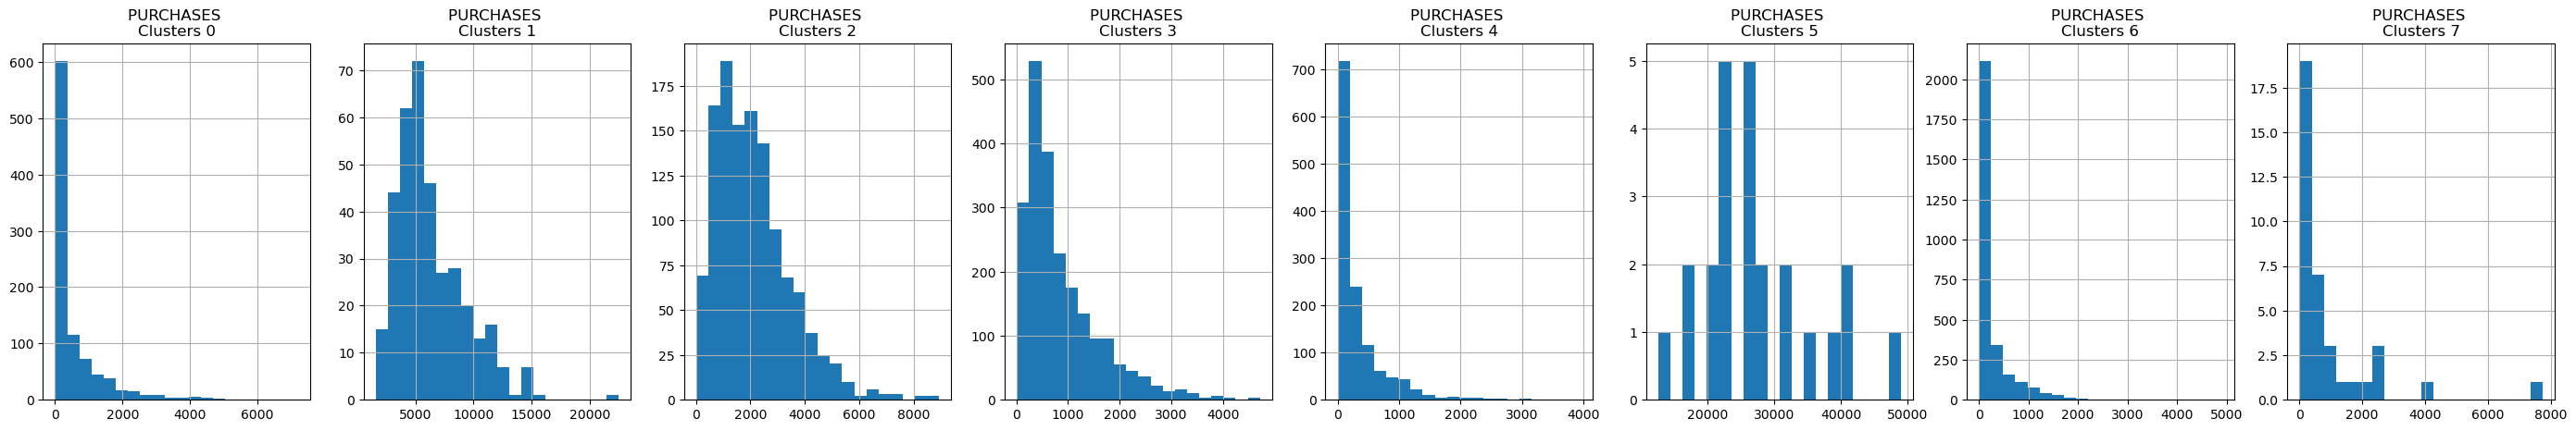

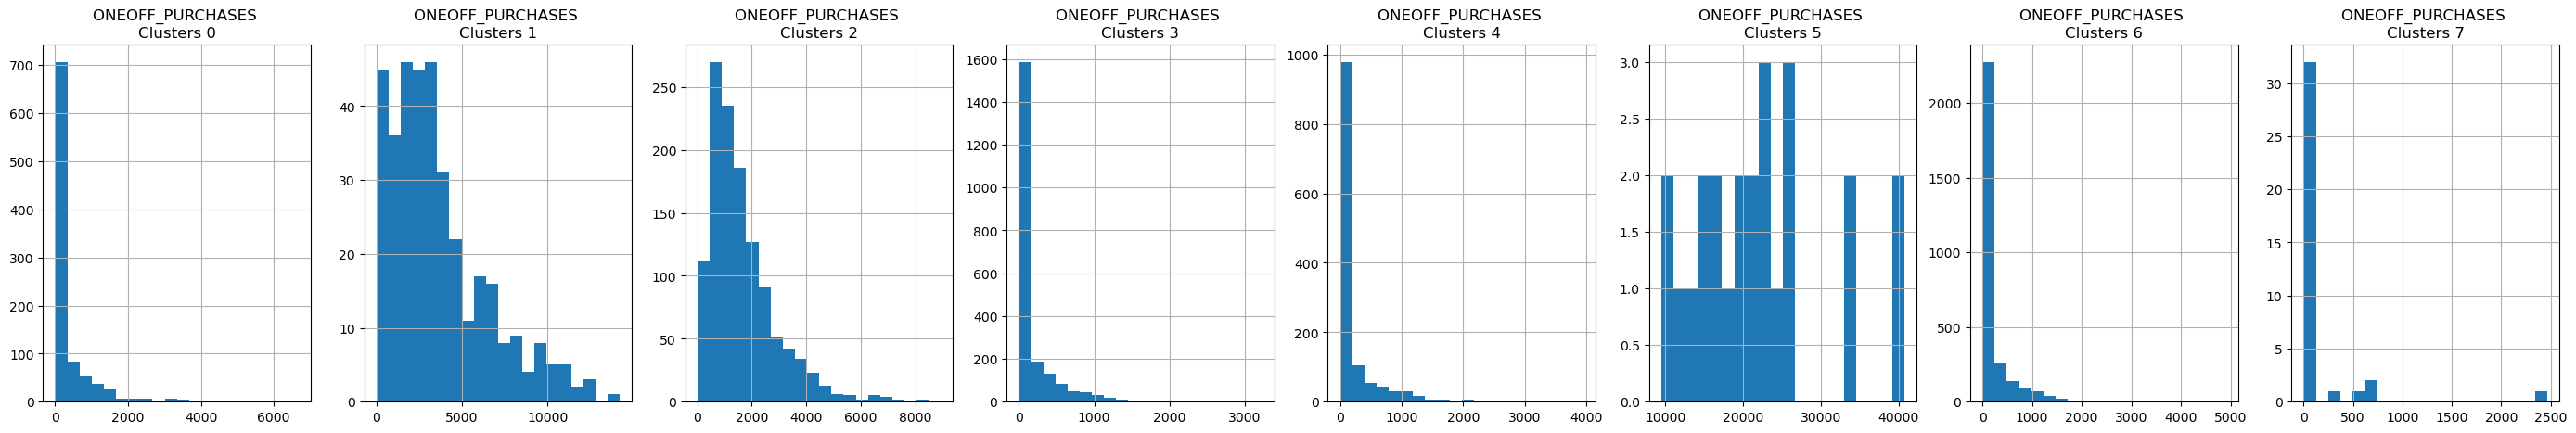

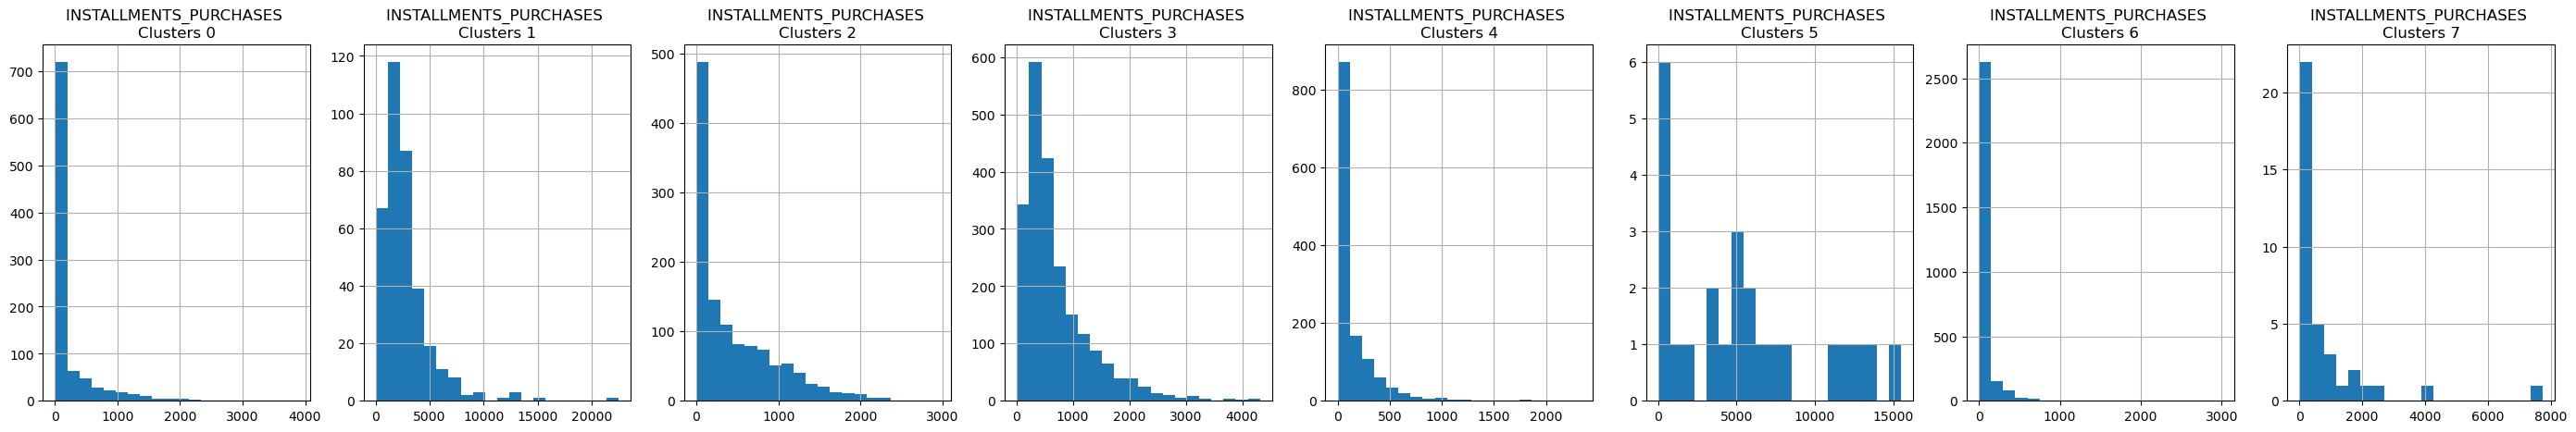

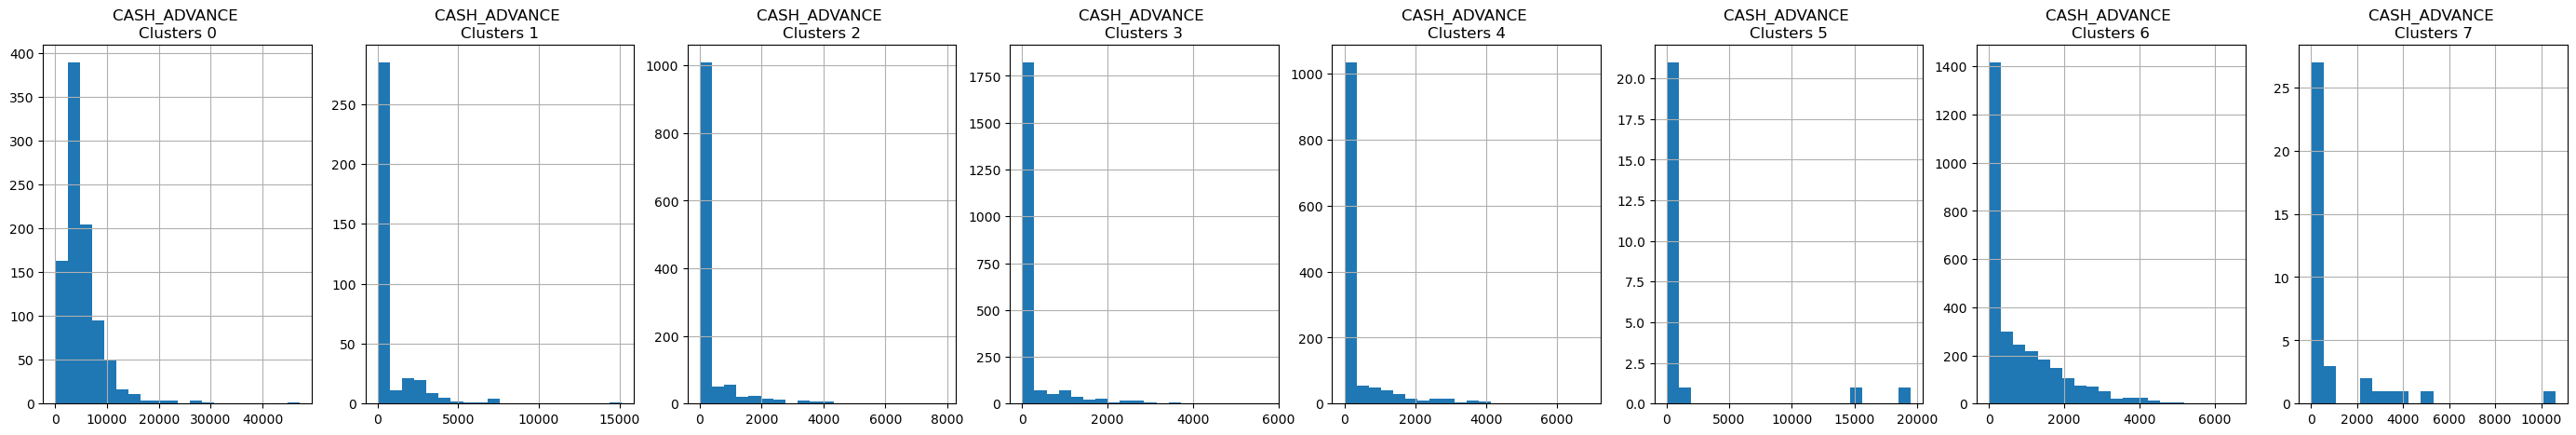

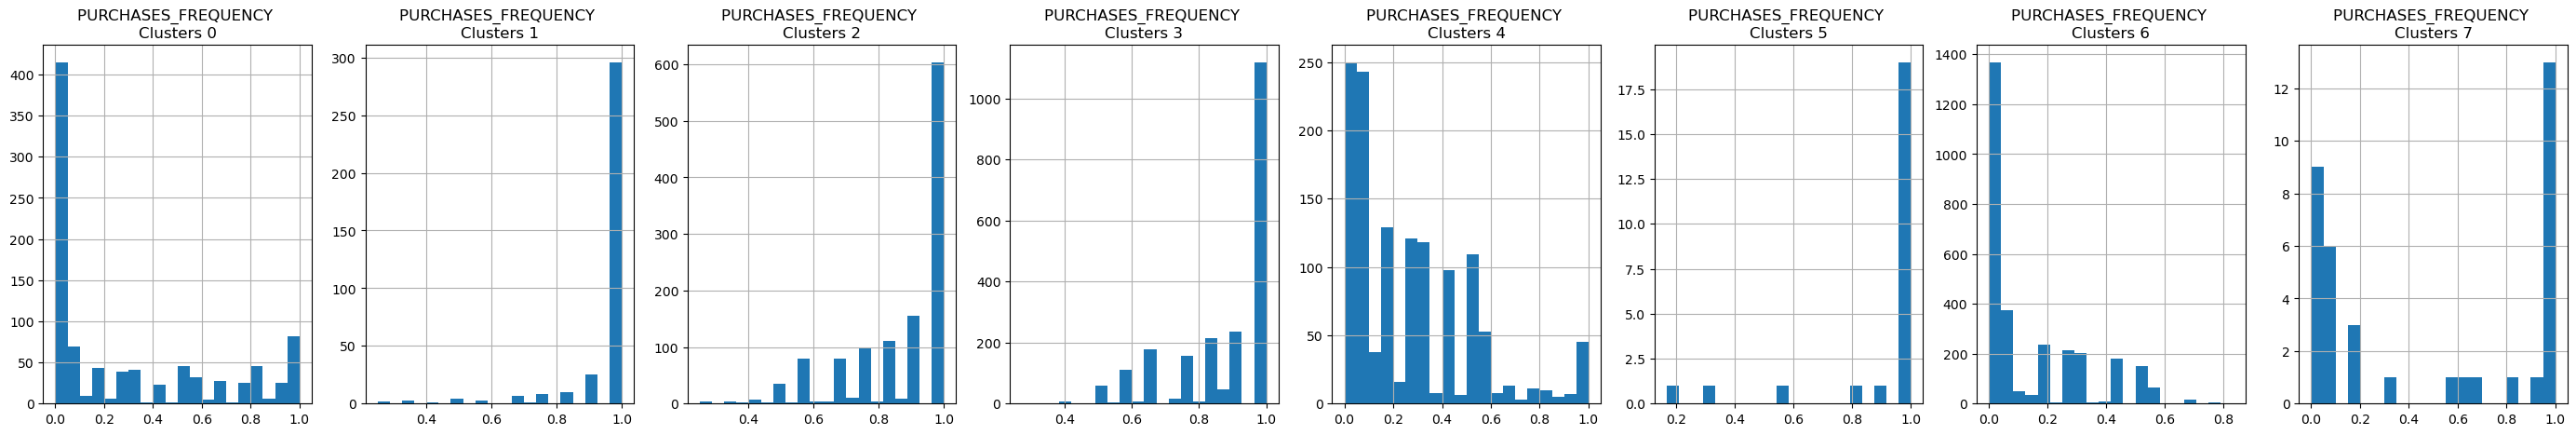

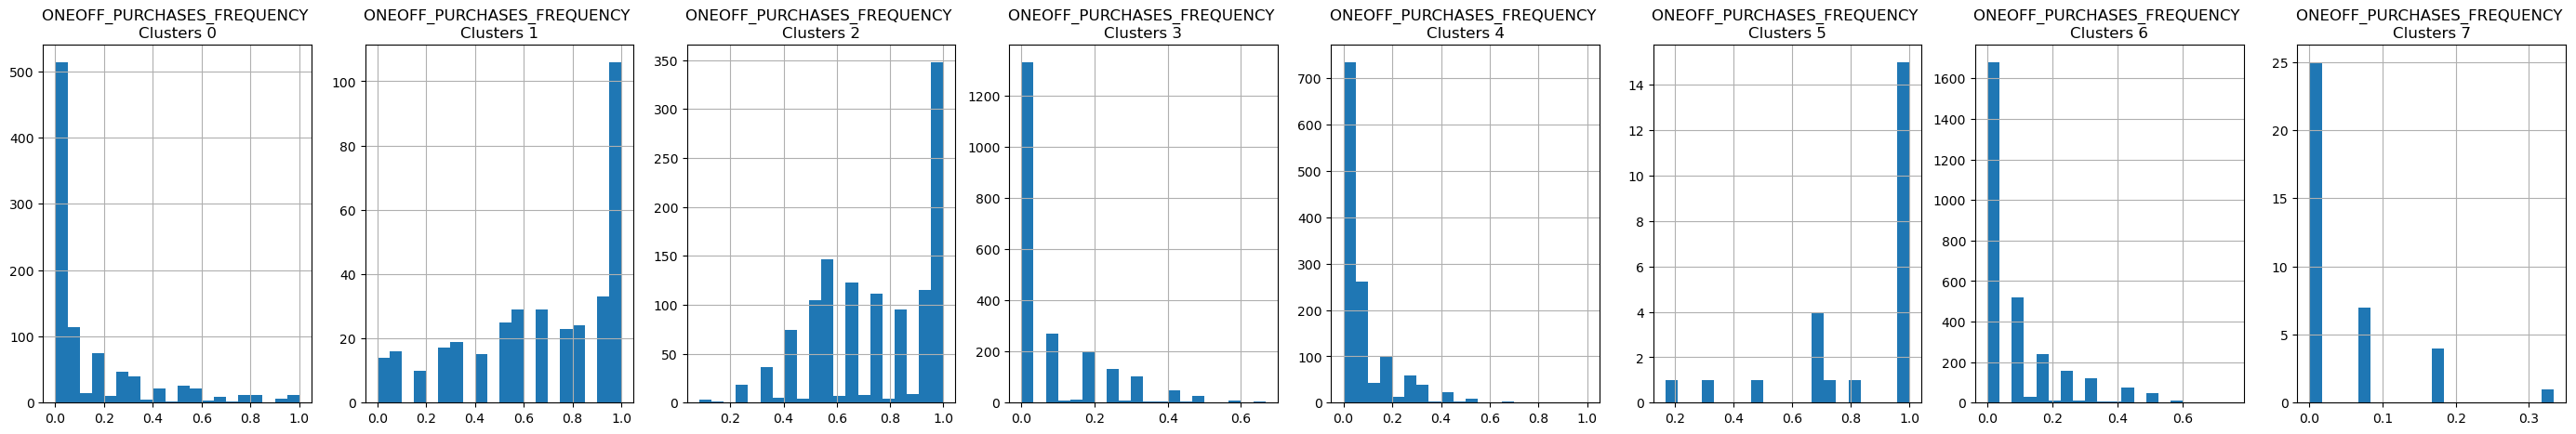

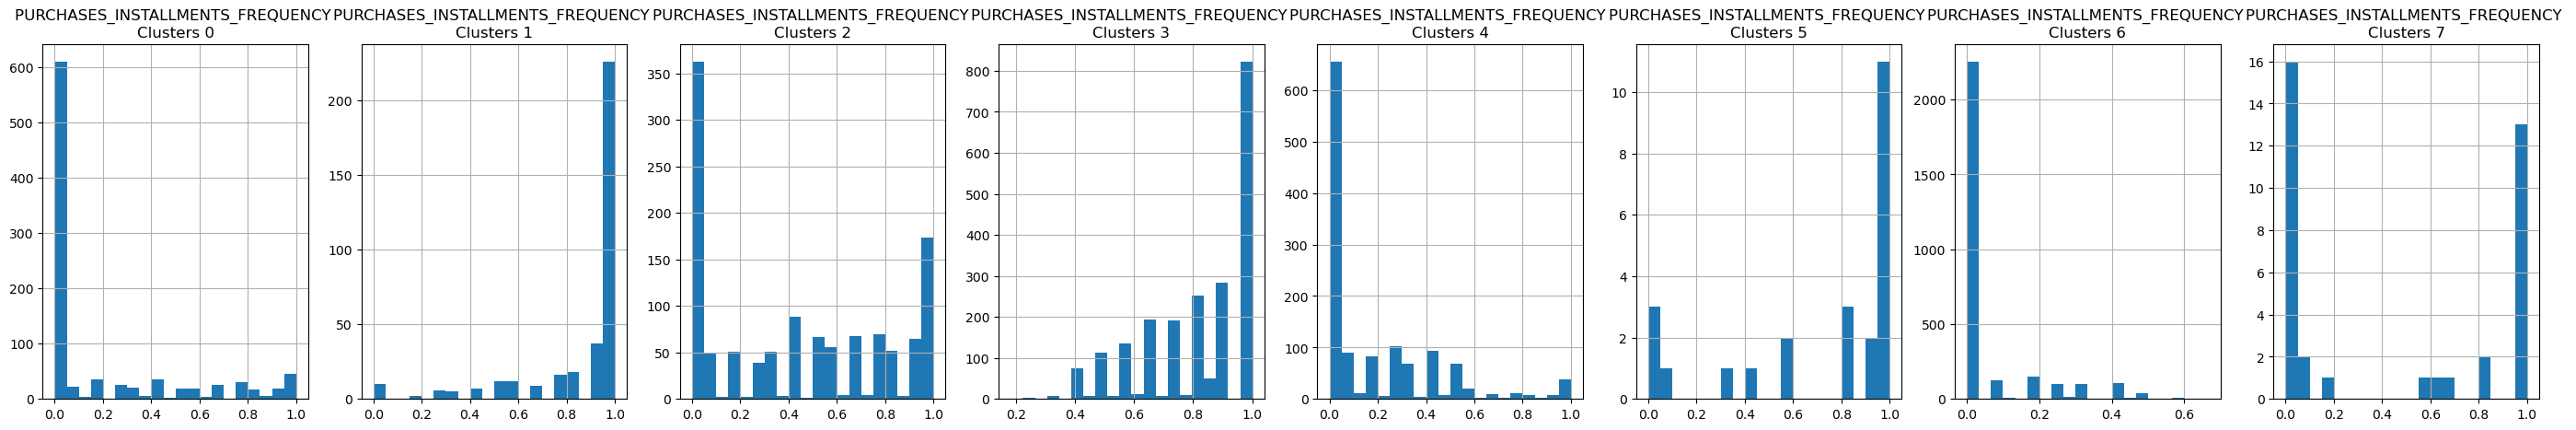

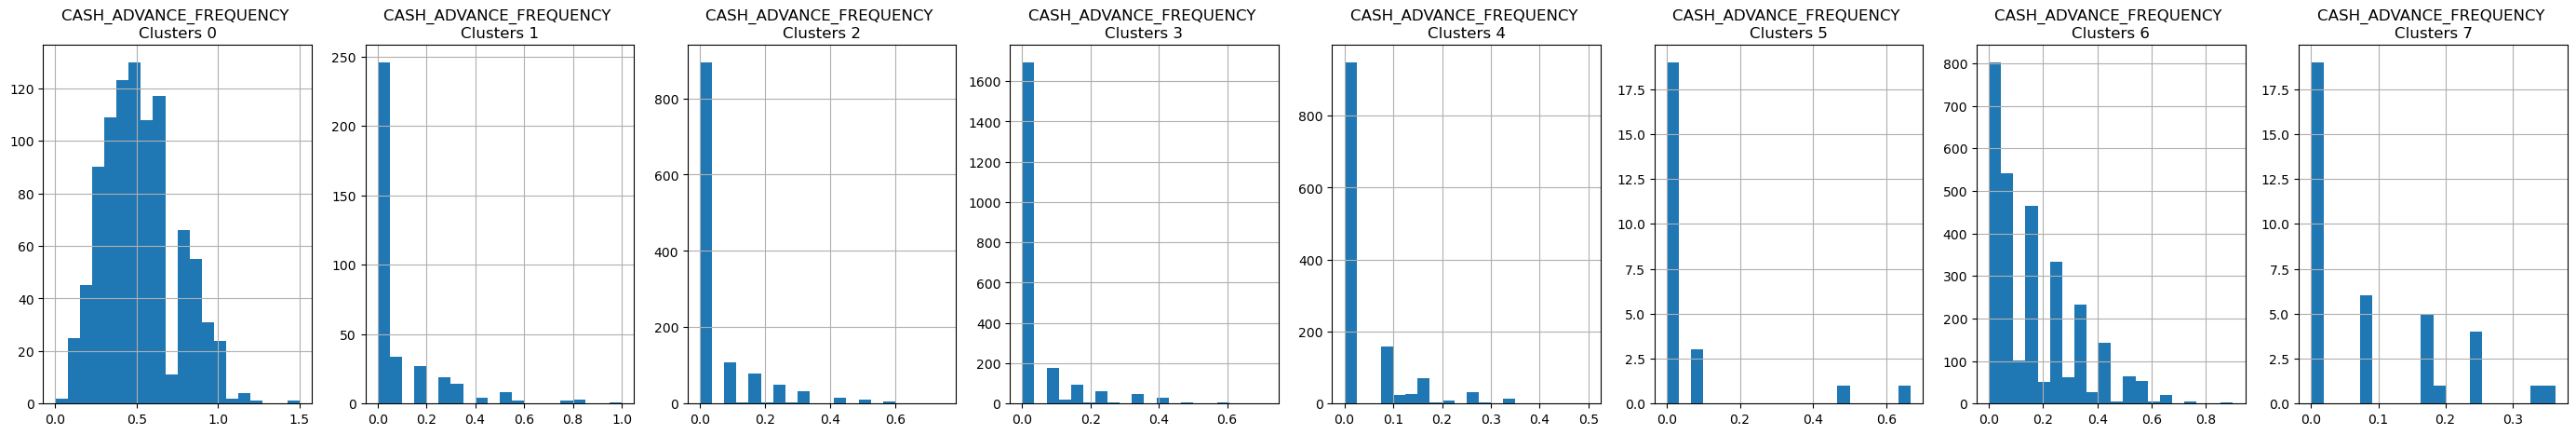

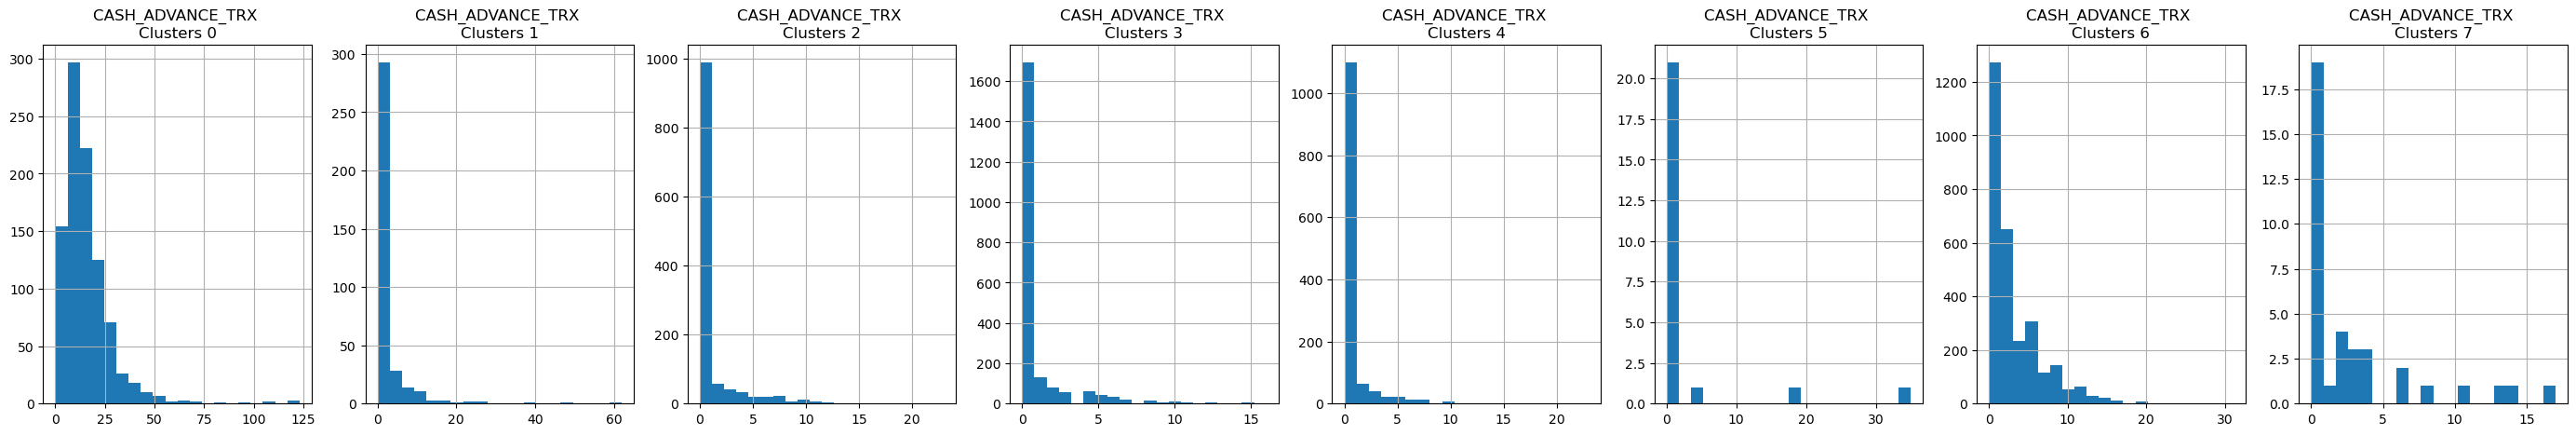

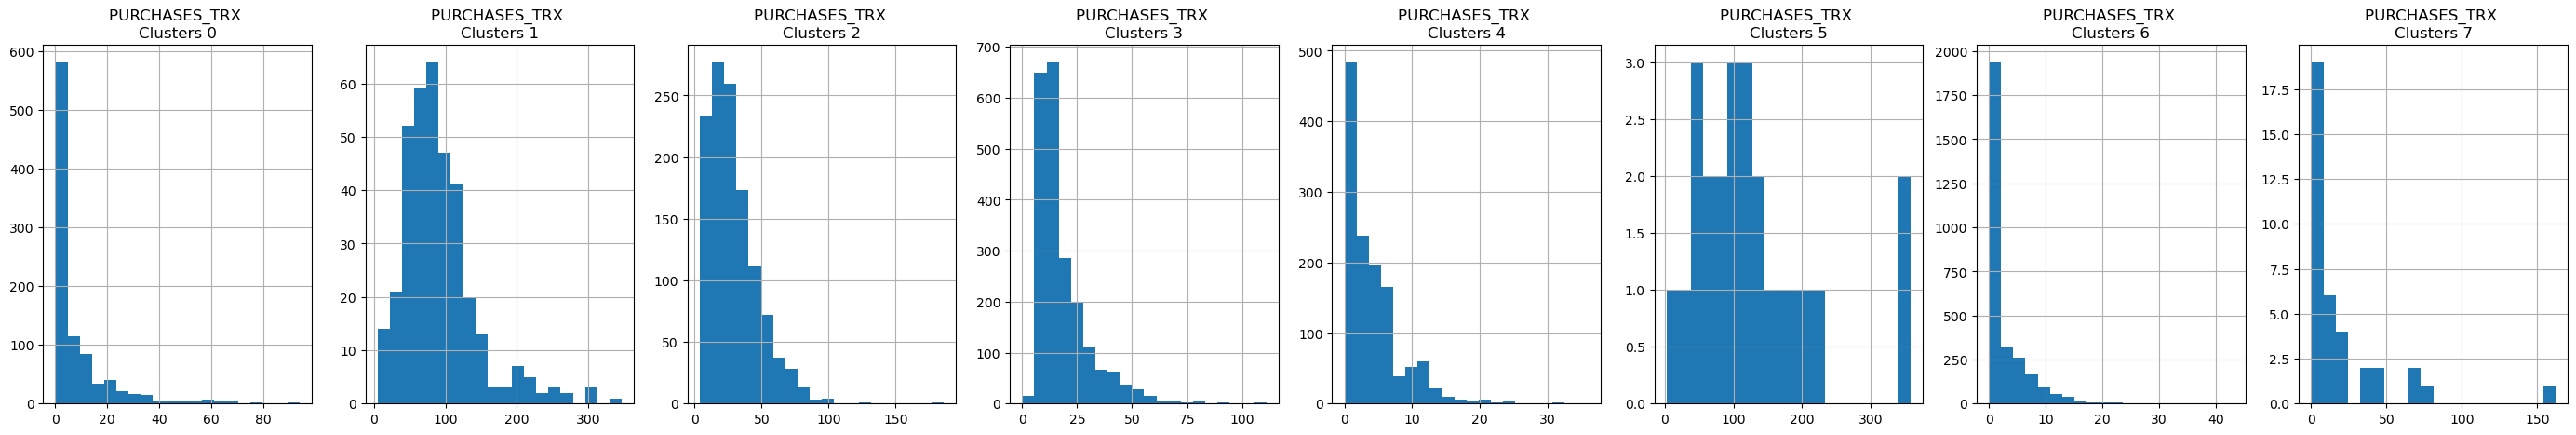

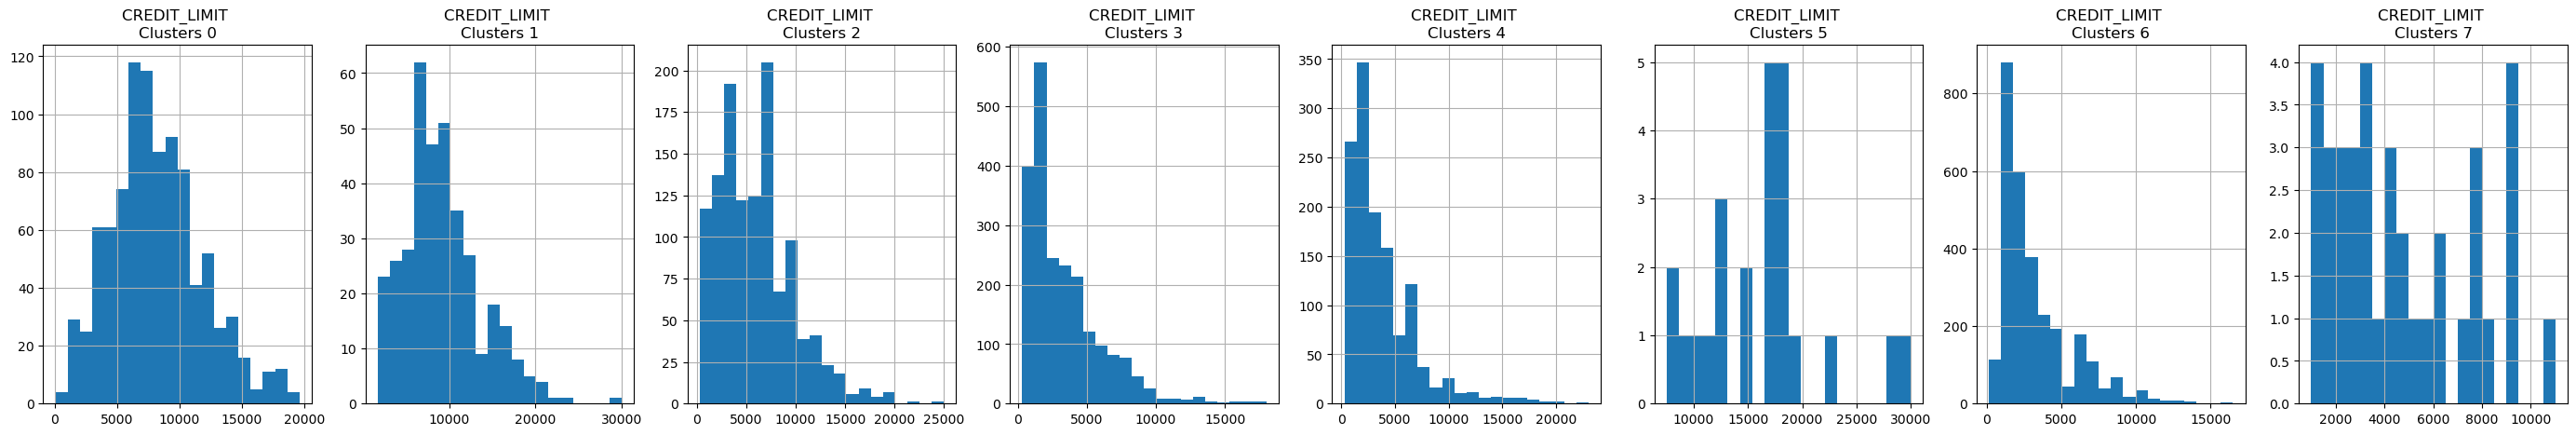

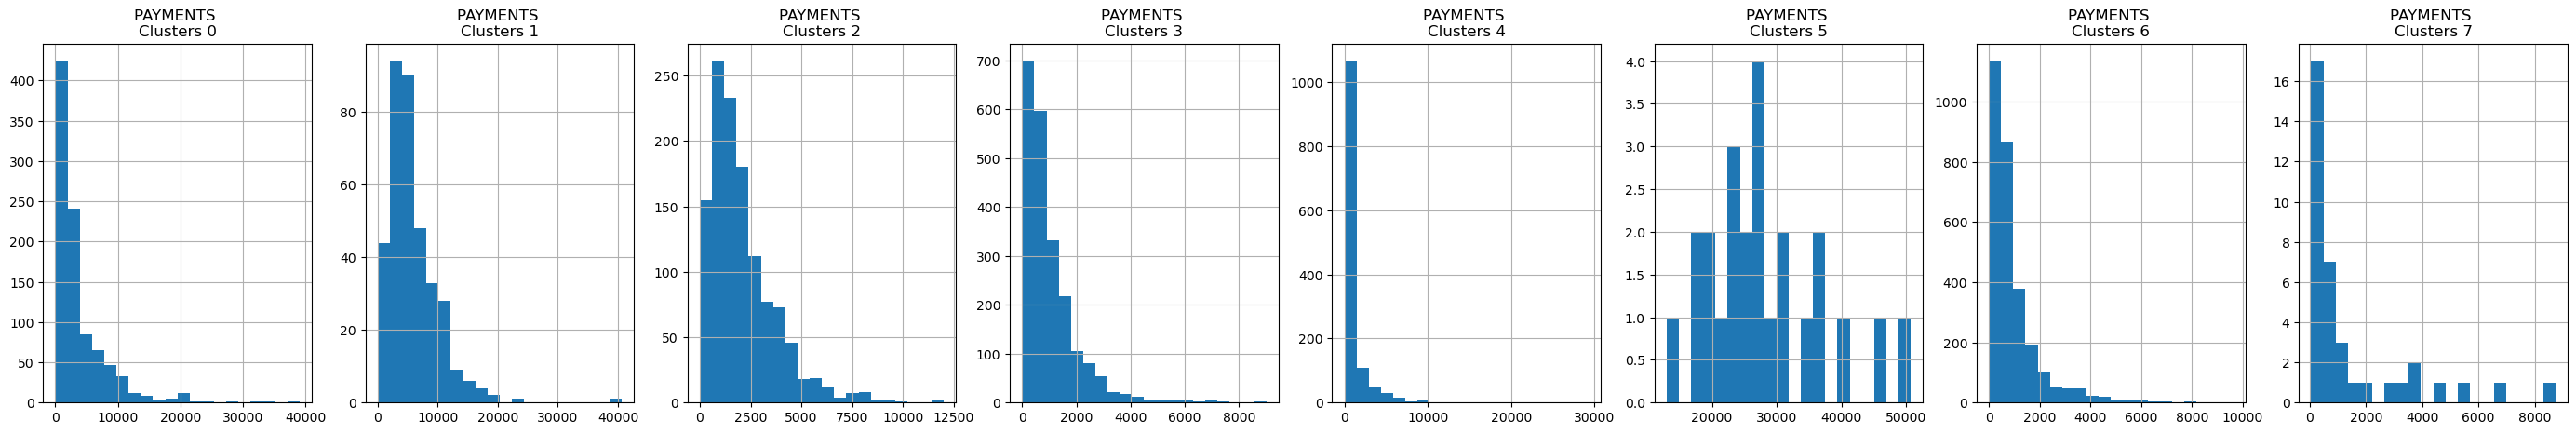

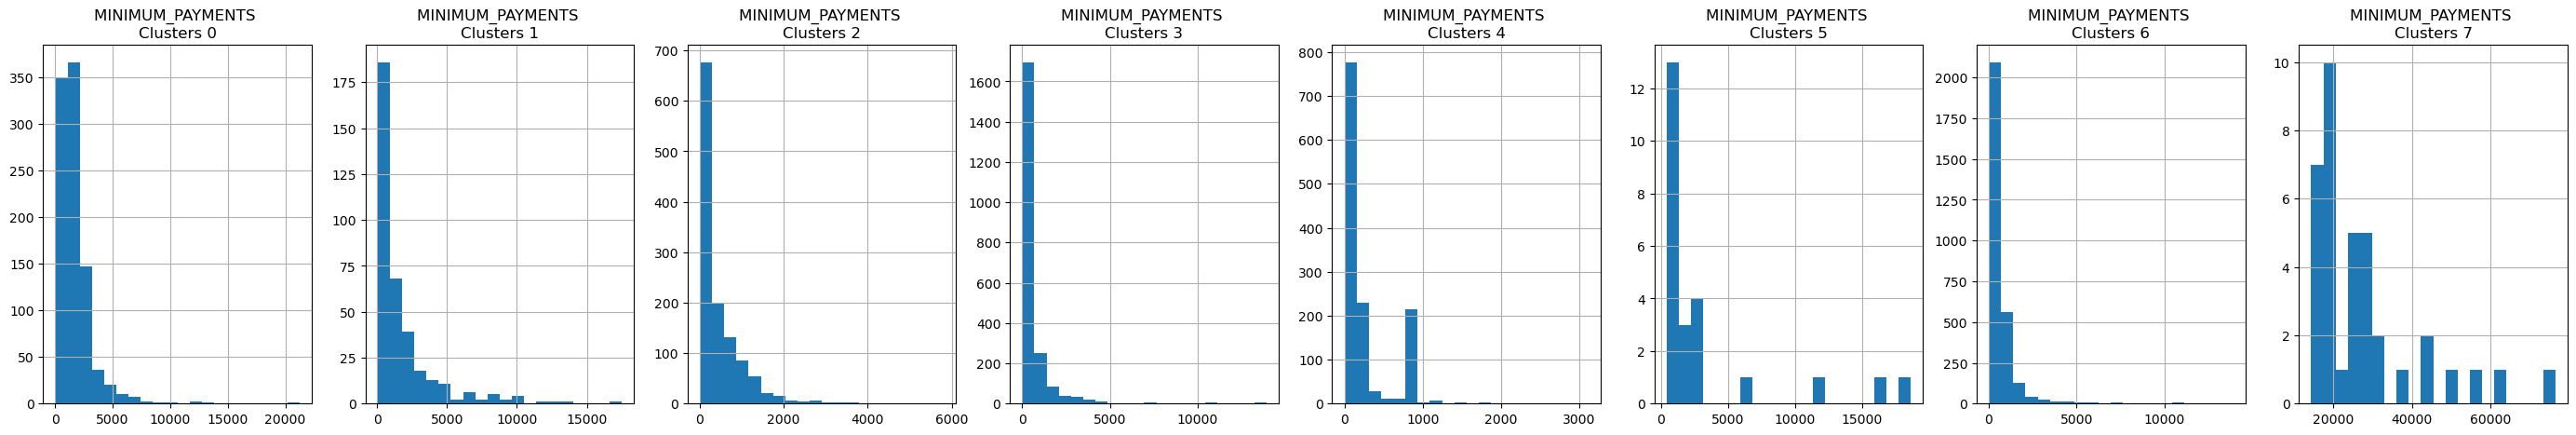

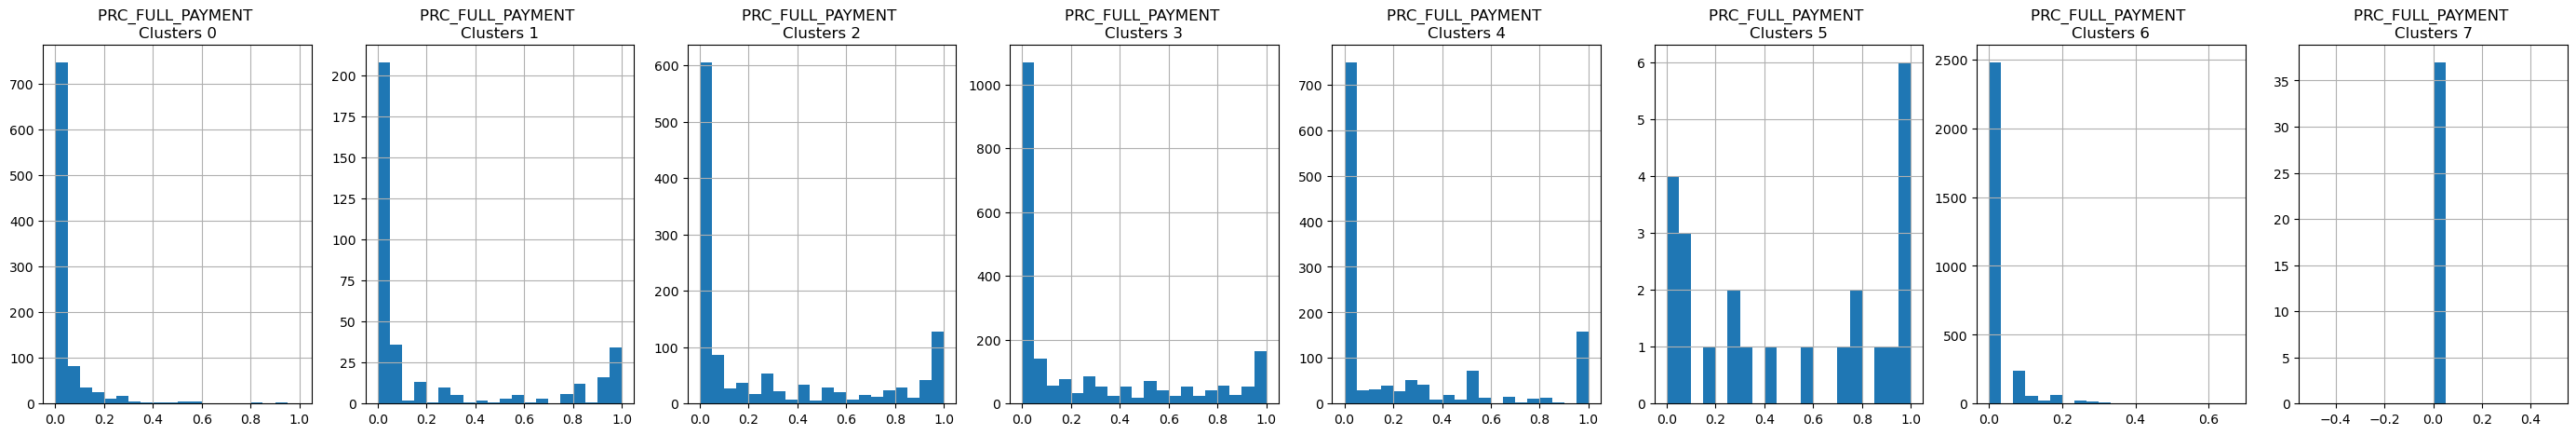

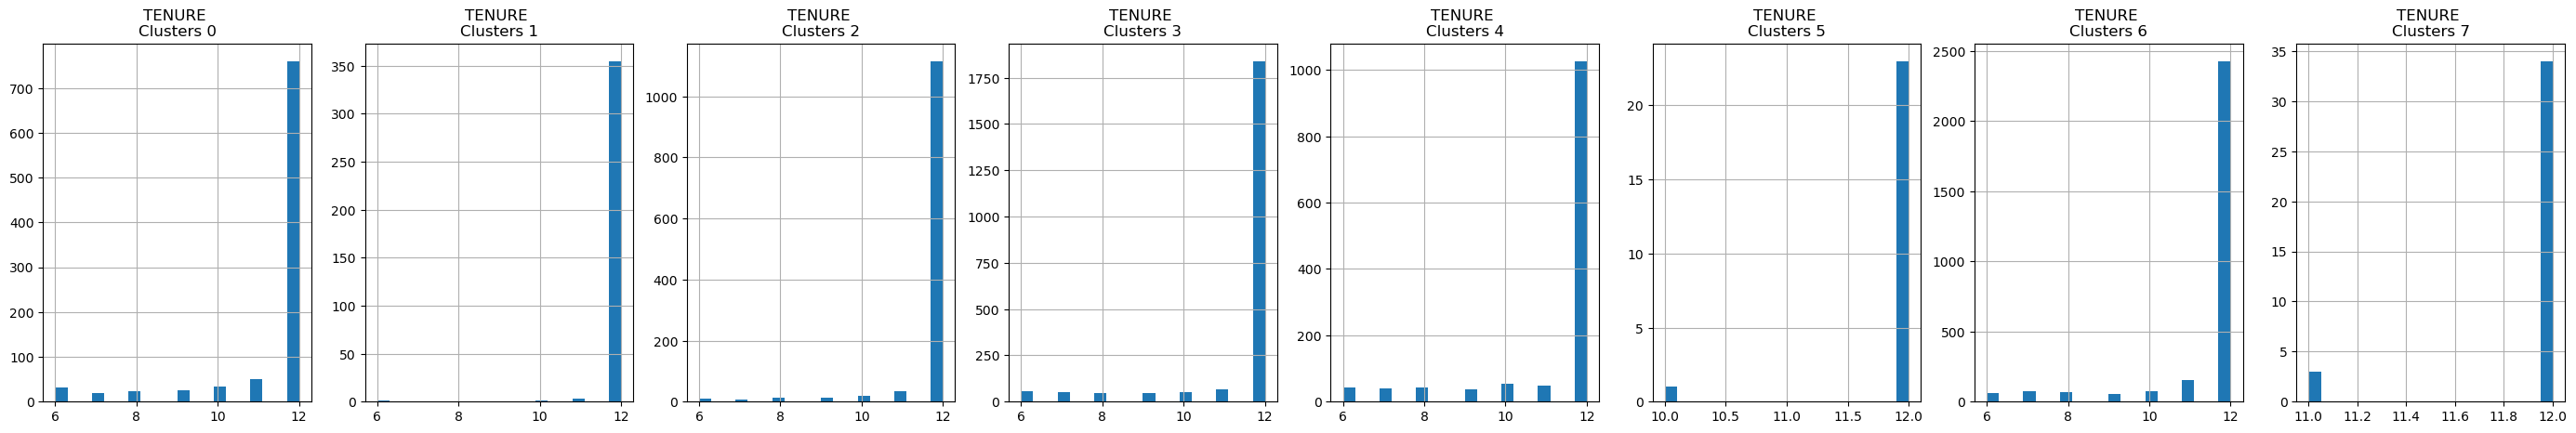

In [22]:
for i in marketing_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = marketing_df_clusters[marketing_df_clusters['CLUSTERS'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nClusters {}'.format(i,j))
plt.show()

### Dimensity reduction

#### PCA

In [23]:
# Obtain the principal components
pca = PCA(n_components = 2)
pca = pca.fit_transform(marketing_df_scaled)
pca

array([[-1.68222058, -1.07645175],
       [-1.1382953 ,  2.50647314],
       [ 0.96968347, -0.38351131],
       ...,
       [-0.92620384, -1.81078597],
       [-2.33655136, -0.65796948],
       [-0.55642128, -0.40046503]])

In [24]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.DataFrame(pca, columns = ['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-1.682221,-1.076452
1,-1.138295,2.506473
2,0.969683,-0.383511
3,-0.873628,0.043163
4,-1.599434,-0.688581
...,...,...
8945,-0.359629,-2.016145
8946,-0.564369,-1.639126
8947,-0.926204,-1.810786
8948,-2.336551,-0.657969


In [25]:
pca_df = pd.concat([pca_df, pd.DataFrame({'clusters': labels})], axis = 1)
pca_df

,pca1,pca2,clusters
0,-1.682221,-1.076452,6
1,-1.138295,2.506473,0
2,0.969683,-0.383511,2
3,-0.873628,0.043163,6
4,-1.599434,-0.688581,6
...,...,...,...
8945,-0.359629,-2.016145,3
8946,-0.564369,-1.639126,3
8947,-0.926204,-1.810786,3
8948,-2.336551,-0.657969,6


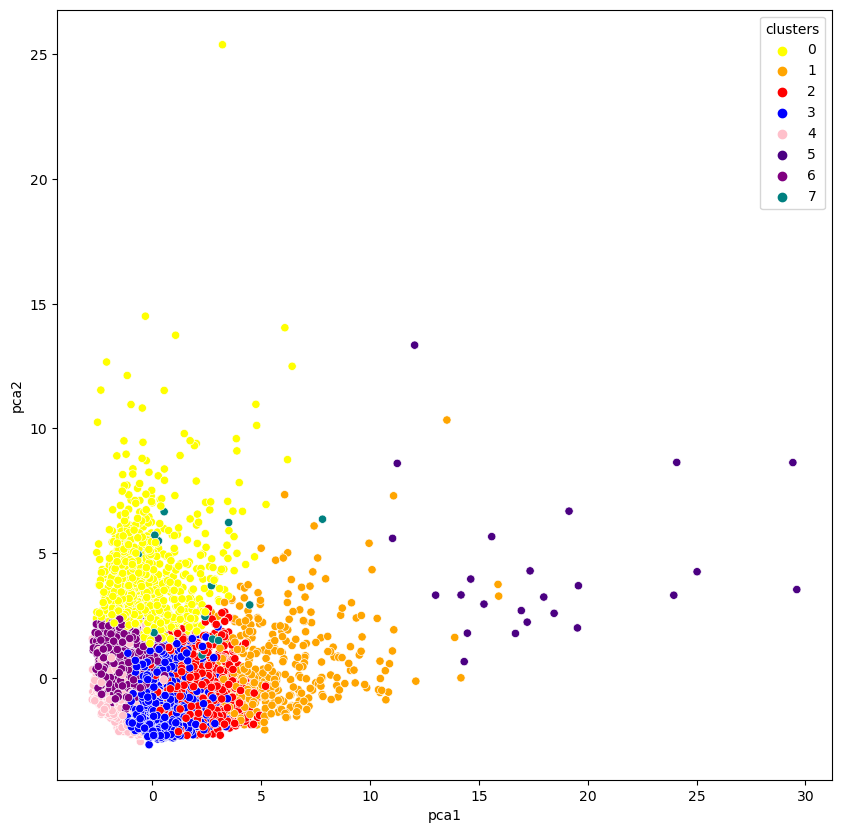

In [26]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'clusters', data = pca_df, 
                     palette = ['yellow', 'orange', 'red', 'blue', 'pink', 'indigo', 'purple', 'teal'])

#### Auto-encoder

In [27]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, \
    Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [28]:
input_df = Input(shape = (17,))

x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)
    
# Autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [29]:
autoencoder.fit(marketing_df_scaled, marketing_df_scaled, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 4s 31ms/step - loss: 0.5424
Epoch 2/25
70/70 [==============================] - 2s 27ms/step - loss: 0.2591
Epoch 3/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1803
Epoch 4/25
70/70 [==============================] - 2s 26ms/step - loss: 0.1657
Epoch 5/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1380
Epoch 6/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1200
Epoch 7/25
70/70 [==============================] - 2s 29ms/step - loss: 0.1143
Epoch 8/25
70/70 [==============================] - 2s 30ms/step - loss: 0.0978
Epoch 9/25
70/70 [==============================] - 2s 29ms/step - loss: 0.0968
Epoch 10/25
70/70 [==============================] - 2s 30ms/step - loss: 0.0970
Epoch 11/25
70/70 [==============================] - 2s 29ms/step - loss: 0.0847
Epoch 12/25
70/70 [==============================] - 2s 29ms/step - loss: 0.0810
Epoch 13/25
70/70 [==================

In [30]:
pred = encoder.predict(marketing_df_scaled)

280/280 [==============================] - 1s 3ms/step


In [31]:
#kmeans on encoded data
wcss1 = []

for n in range(1, 20):
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(pred)
    wcss1.append(kmeans.inertia_)

C:\Users\iamni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamni\anaconda3\lib\site-packages\sklearn\clust

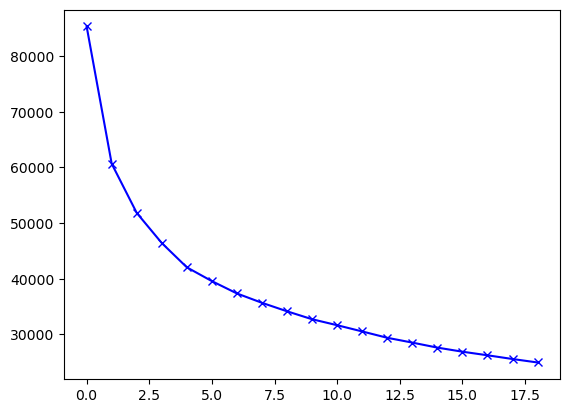

In [32]:
plt.plot(wcss1, 'bx-')

In [33]:
kmeans1 = KMeans(n_clusters = 5)
kmeans1.fit(pred)
labels = kmeans1.labels_

C:\Users\iamni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
cluster_centers1 = pd.DataFrame(data= kmeans1.cluster_centers_ )
cluster_centers1

,0,1,2,3,4,5,6,7,8,9
0,0.541307,0.494503,0.447464,0.687103,0.0,0.281479,0.464890,0.511711,0.428179,0.0
1,1.323152,1.994016,0.693754,0.839456,0.0,0.299496,1.959165,1.668191,1.086417,0.0
2,3.288851,2.205811,1.728608,2.694737,0.0,0.962703,4.042282,4.176199,1.422754,0.0
3,9.207593,3.463211,3.160043,4.127203,0.0,1.192562,8.438182,12.727673,6.950341,0.0
4,0.948520,0.889868,1.187052,3.116120,0.0,0.714675,1.039656,1.668952,0.459636,0.0


In [35]:
pred_df_clusters = pd.concat([marketing_df, pd.DataFrame({'CLUSTERS': labels})], axis =1)
pred_df_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


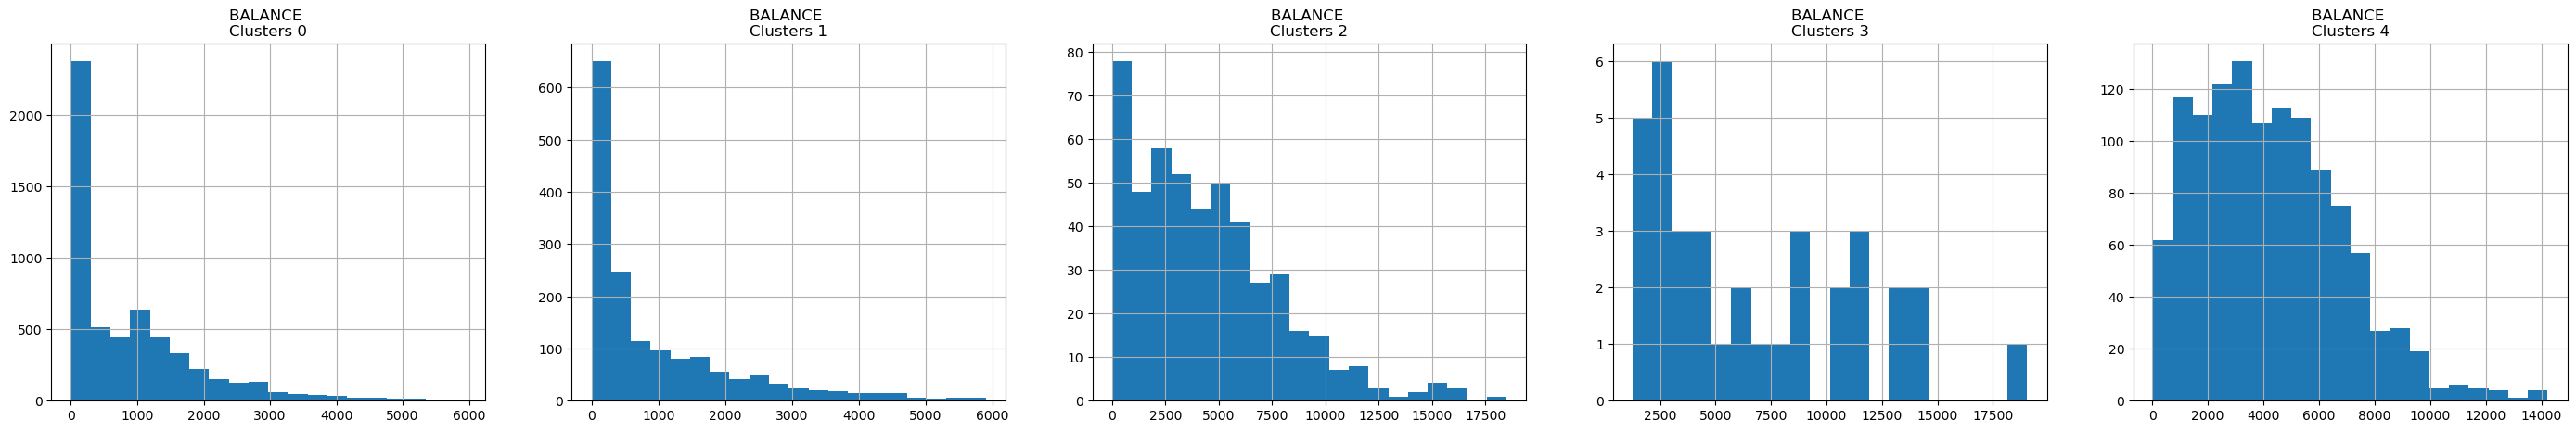

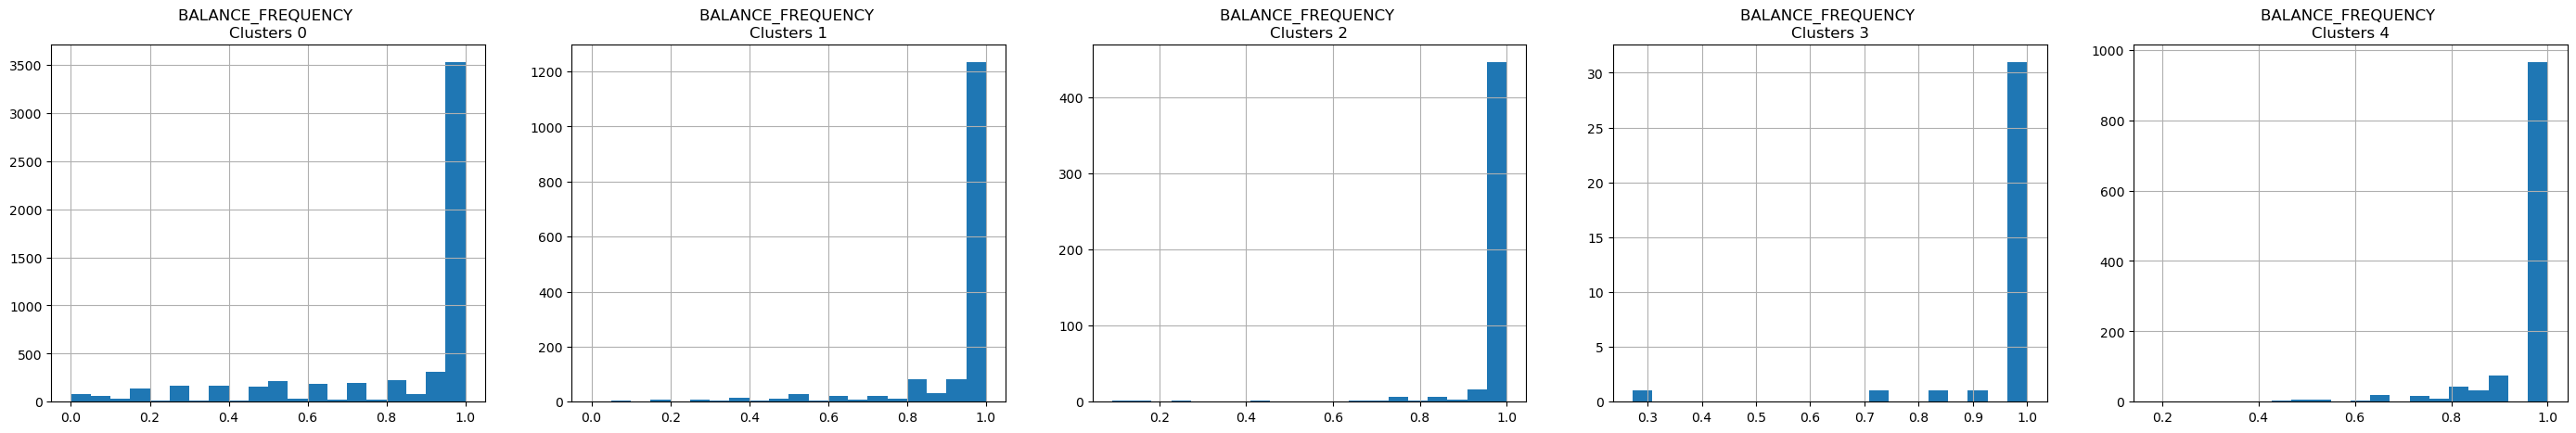

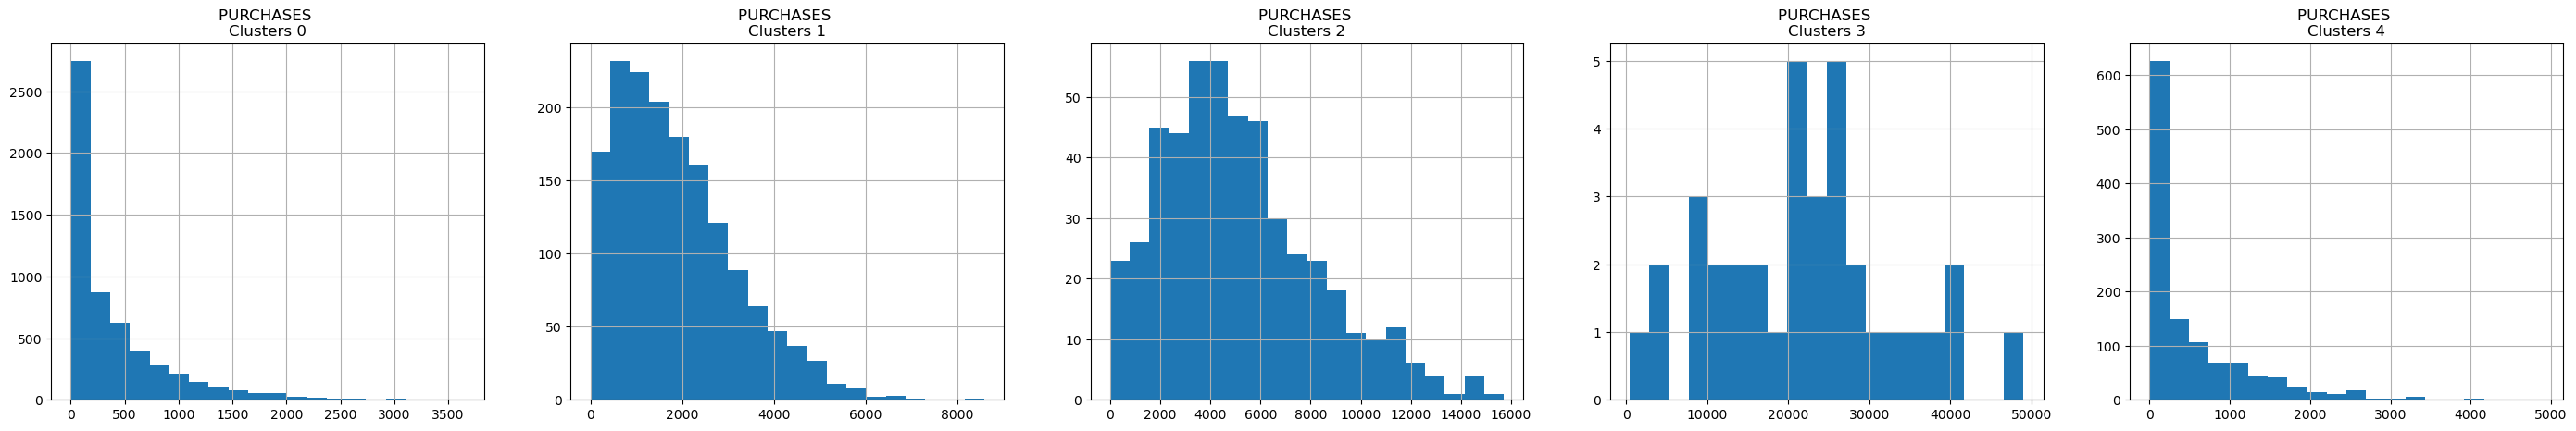

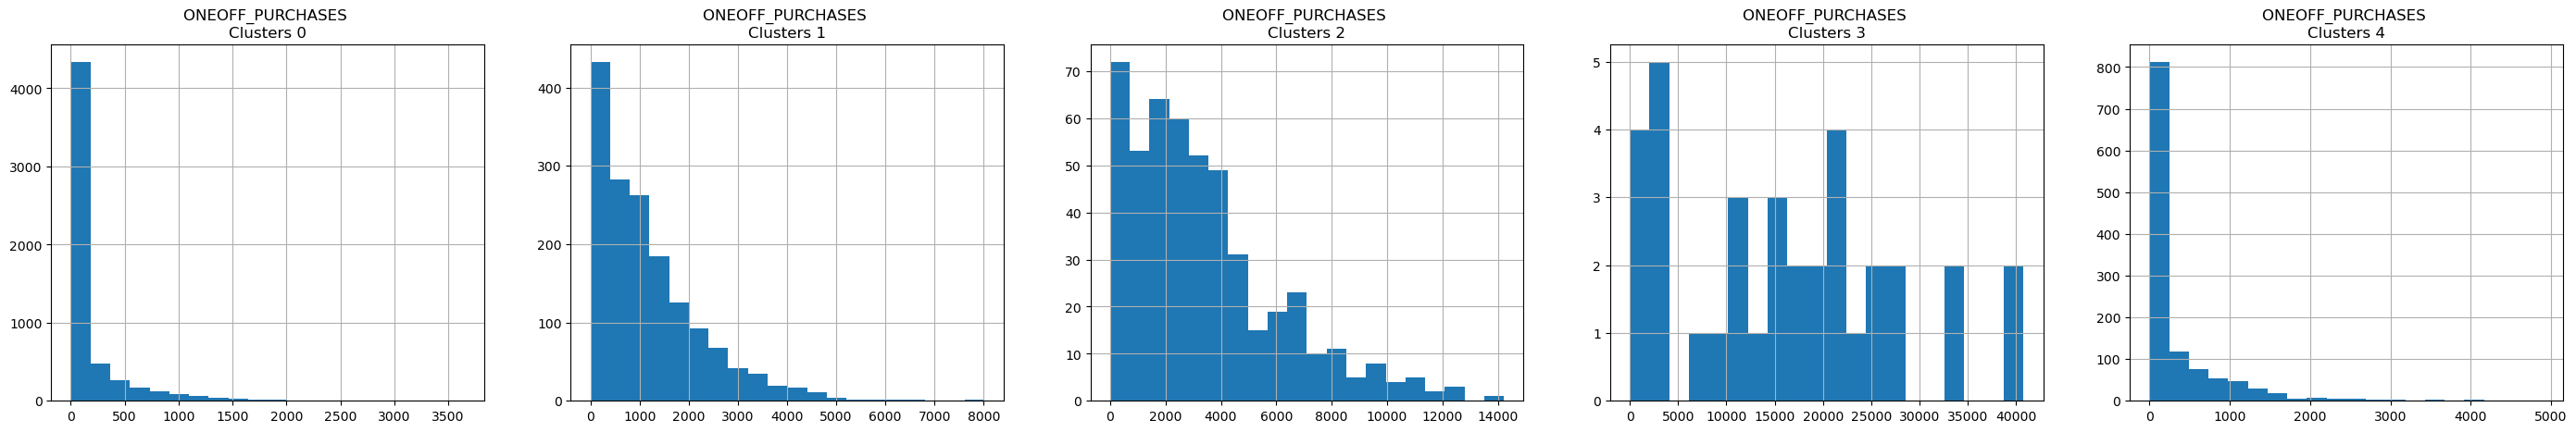

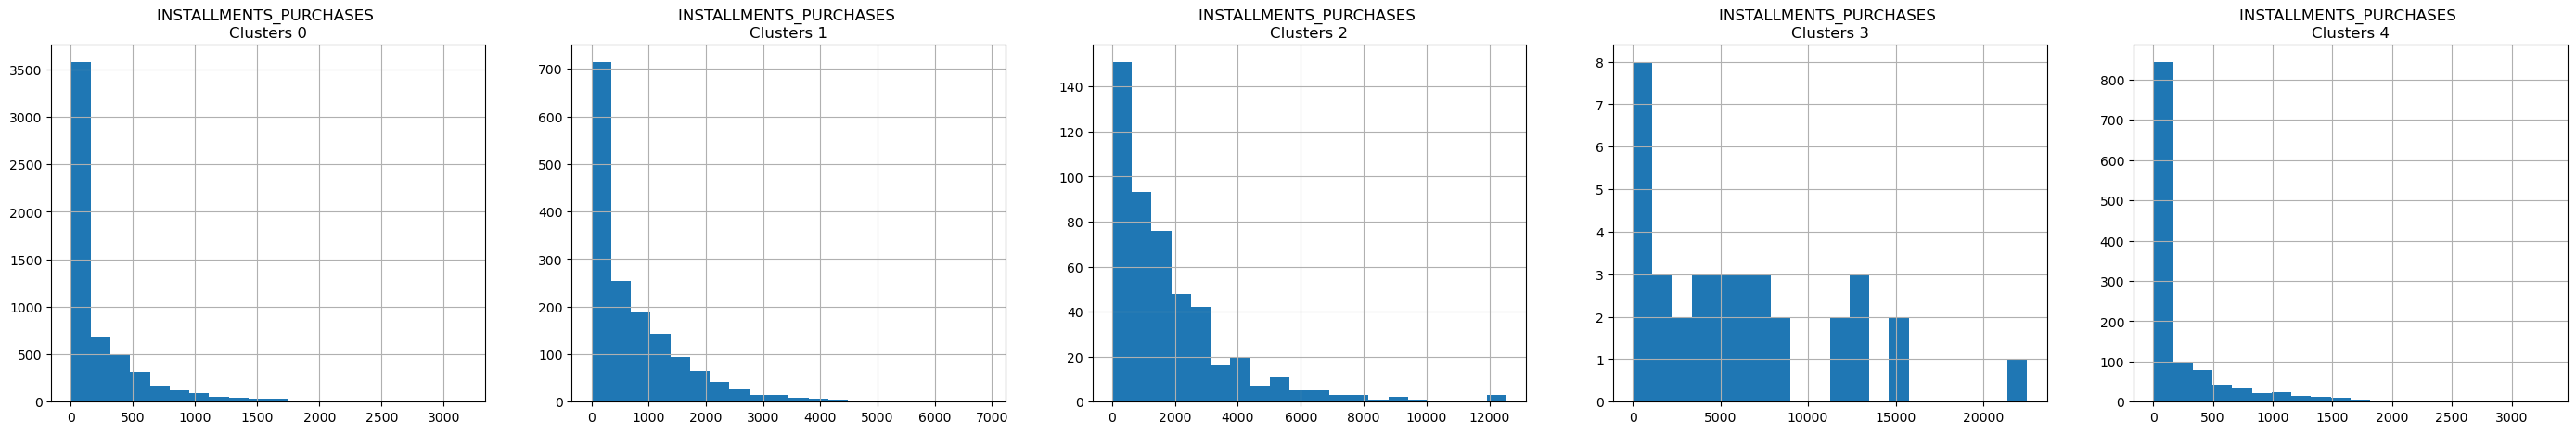

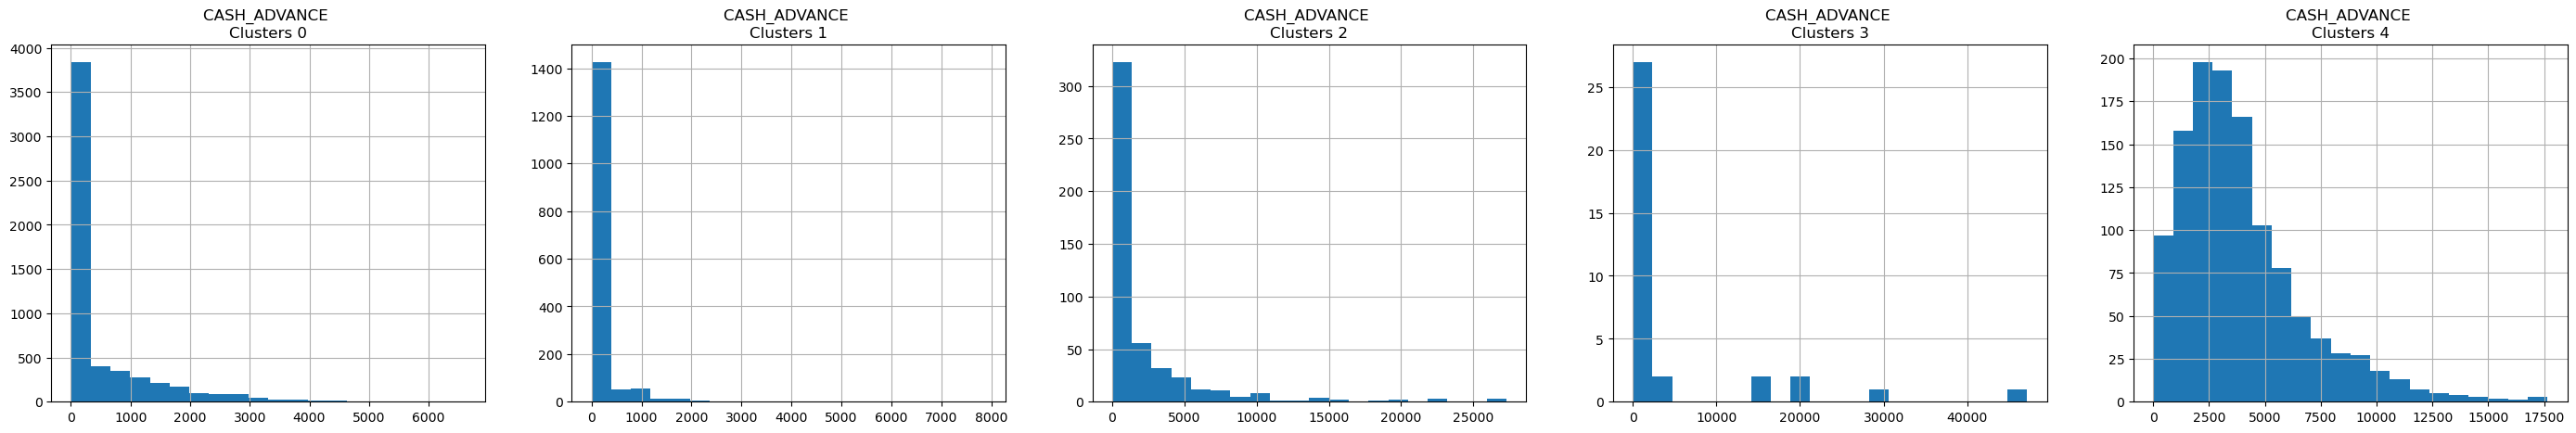

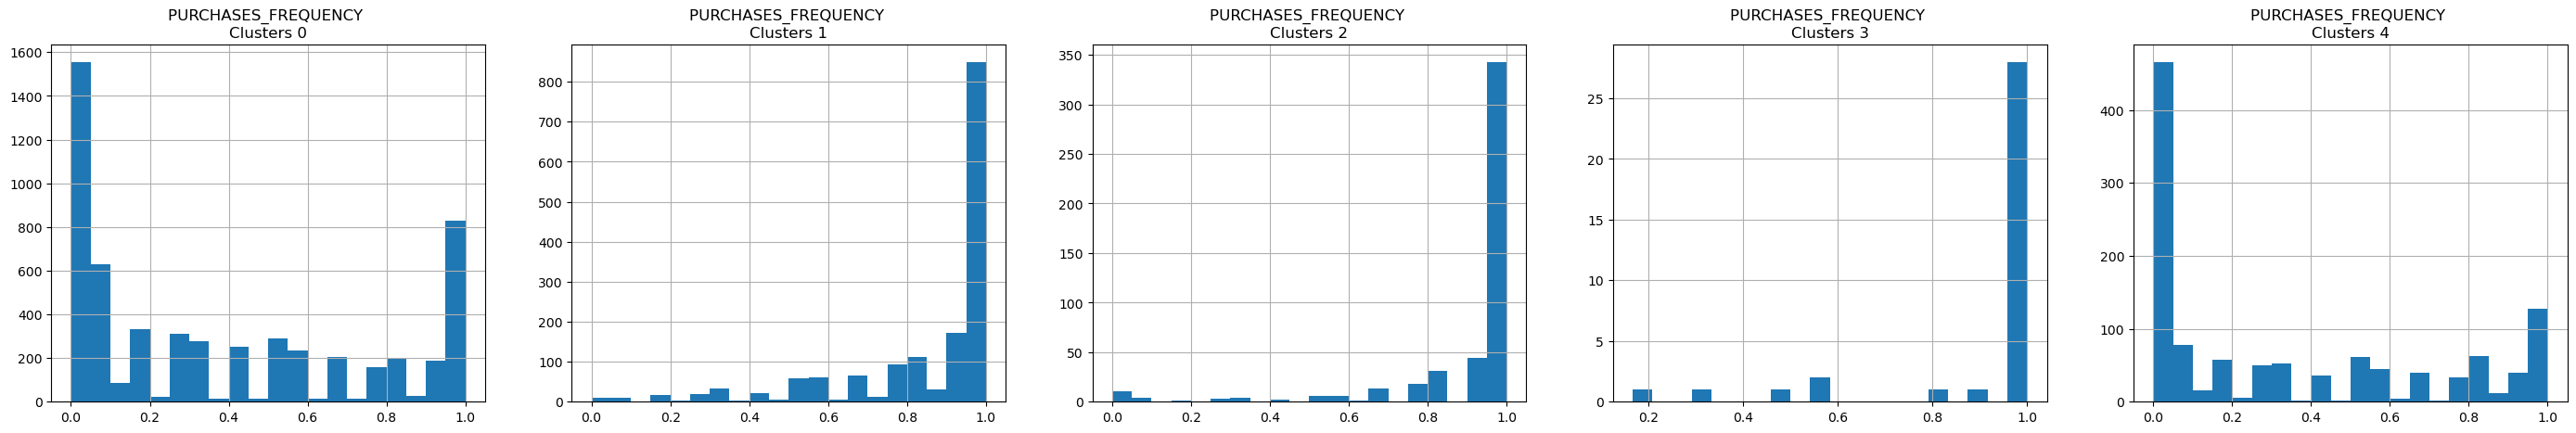

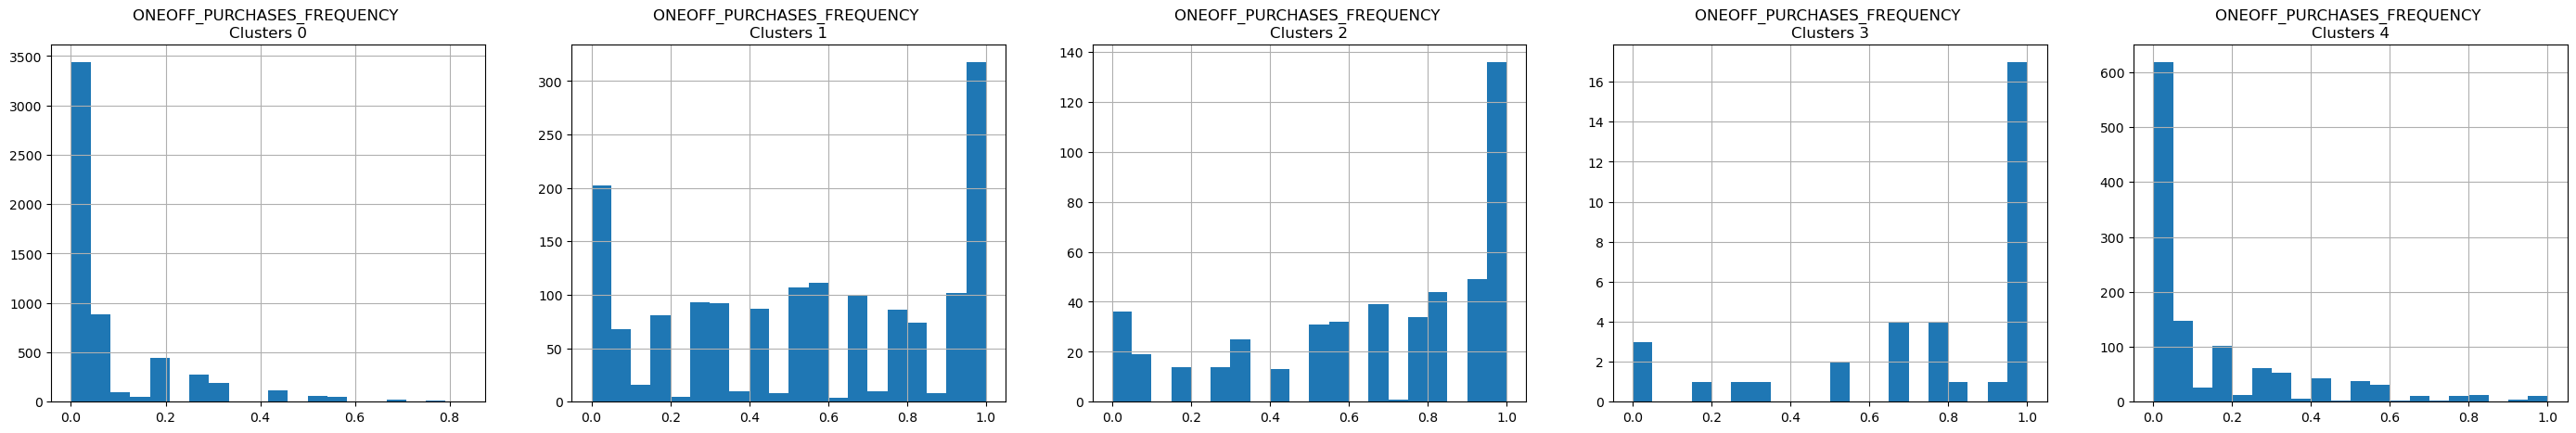

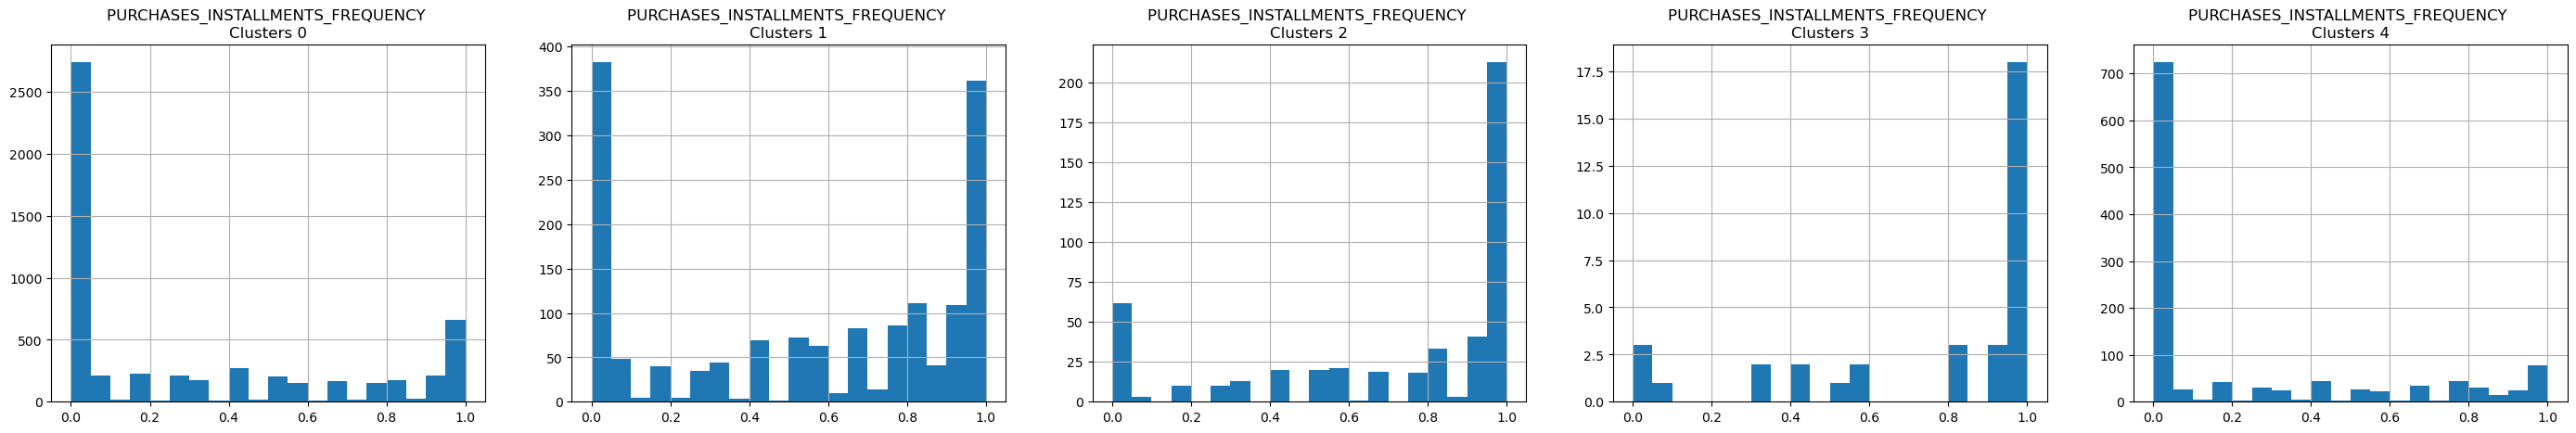

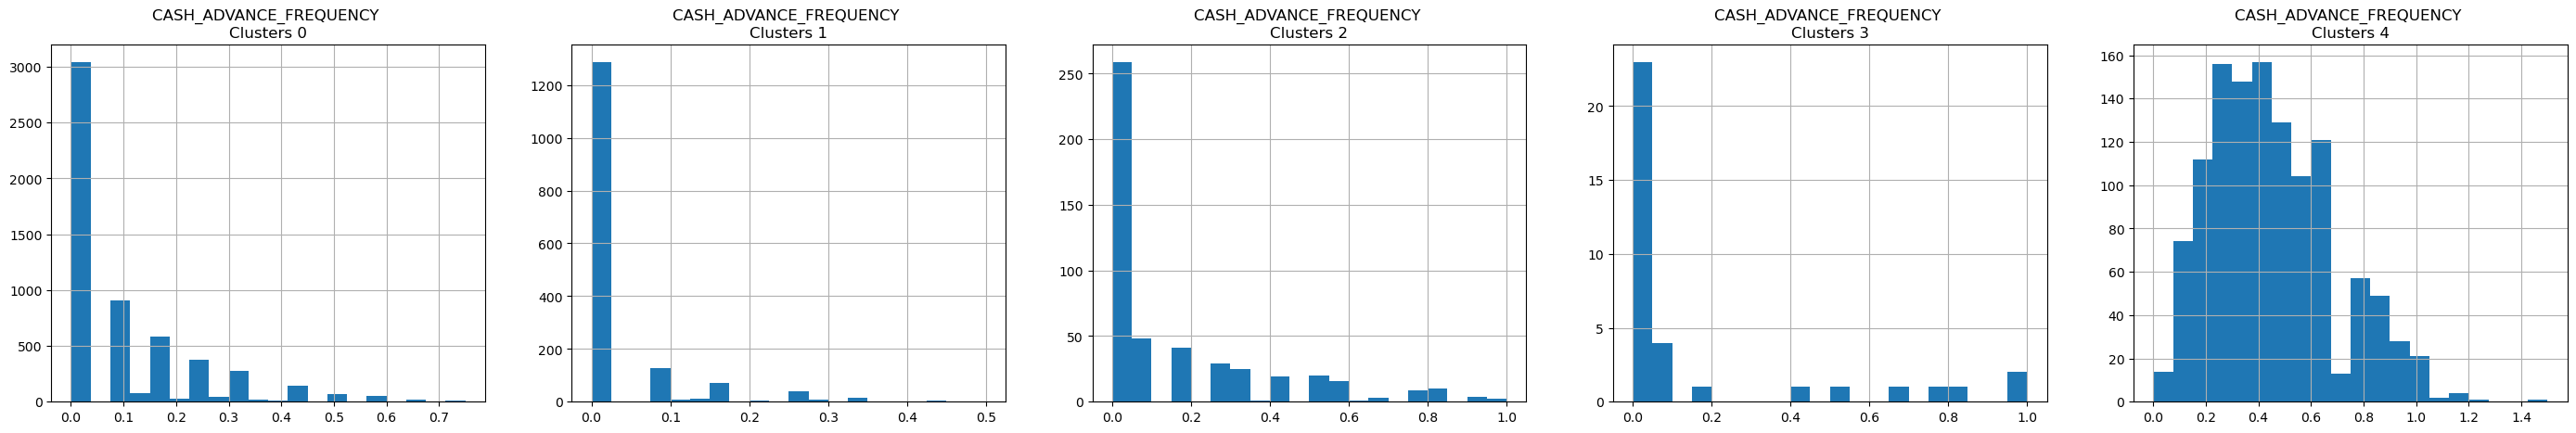

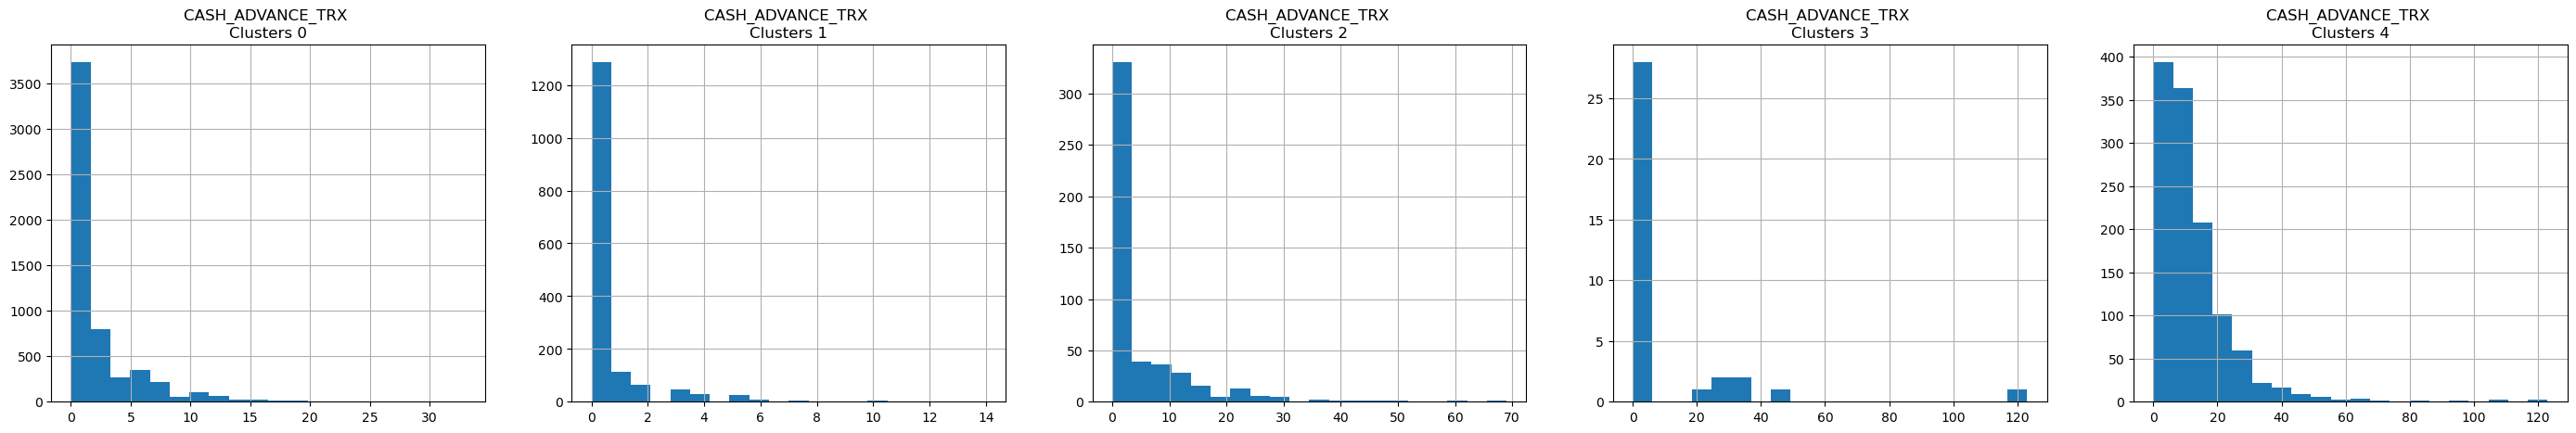

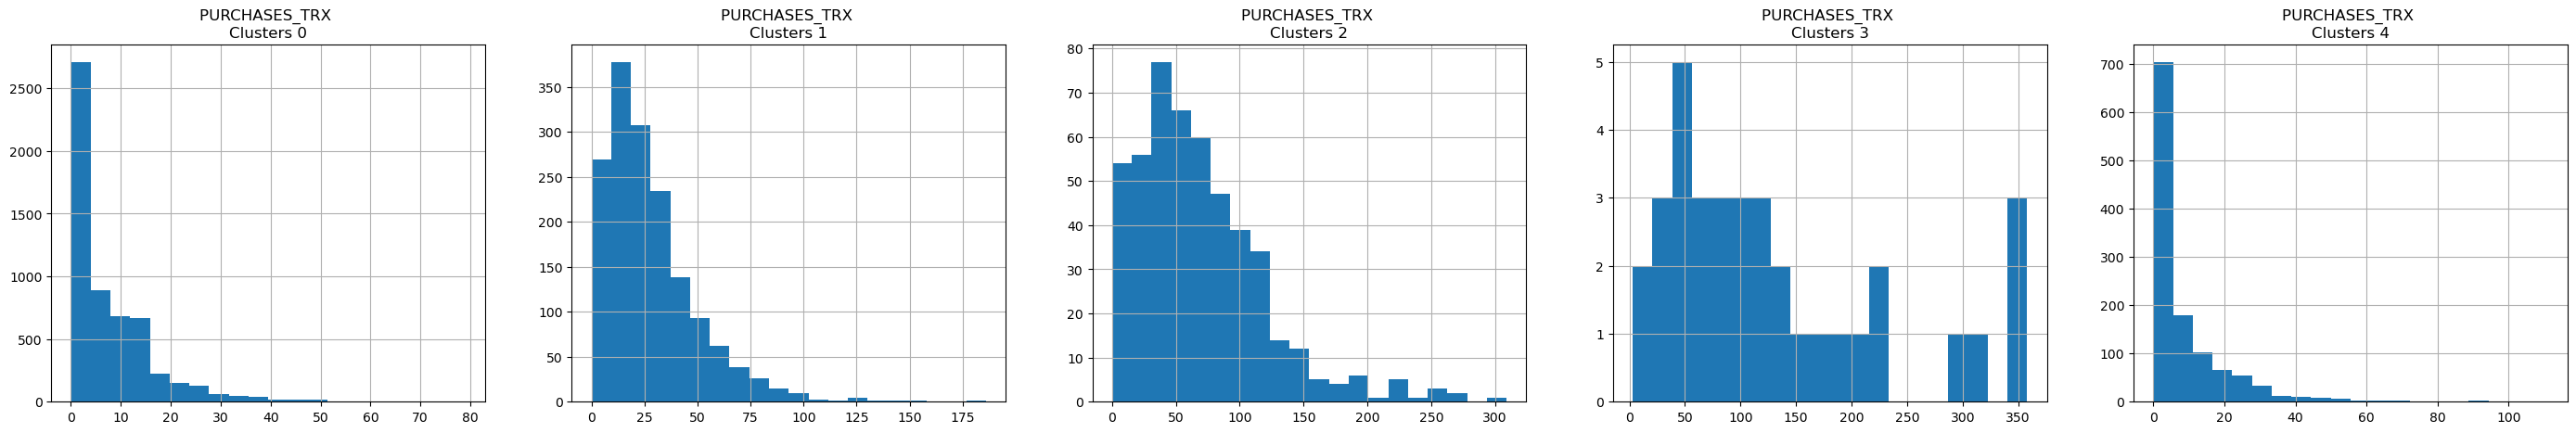

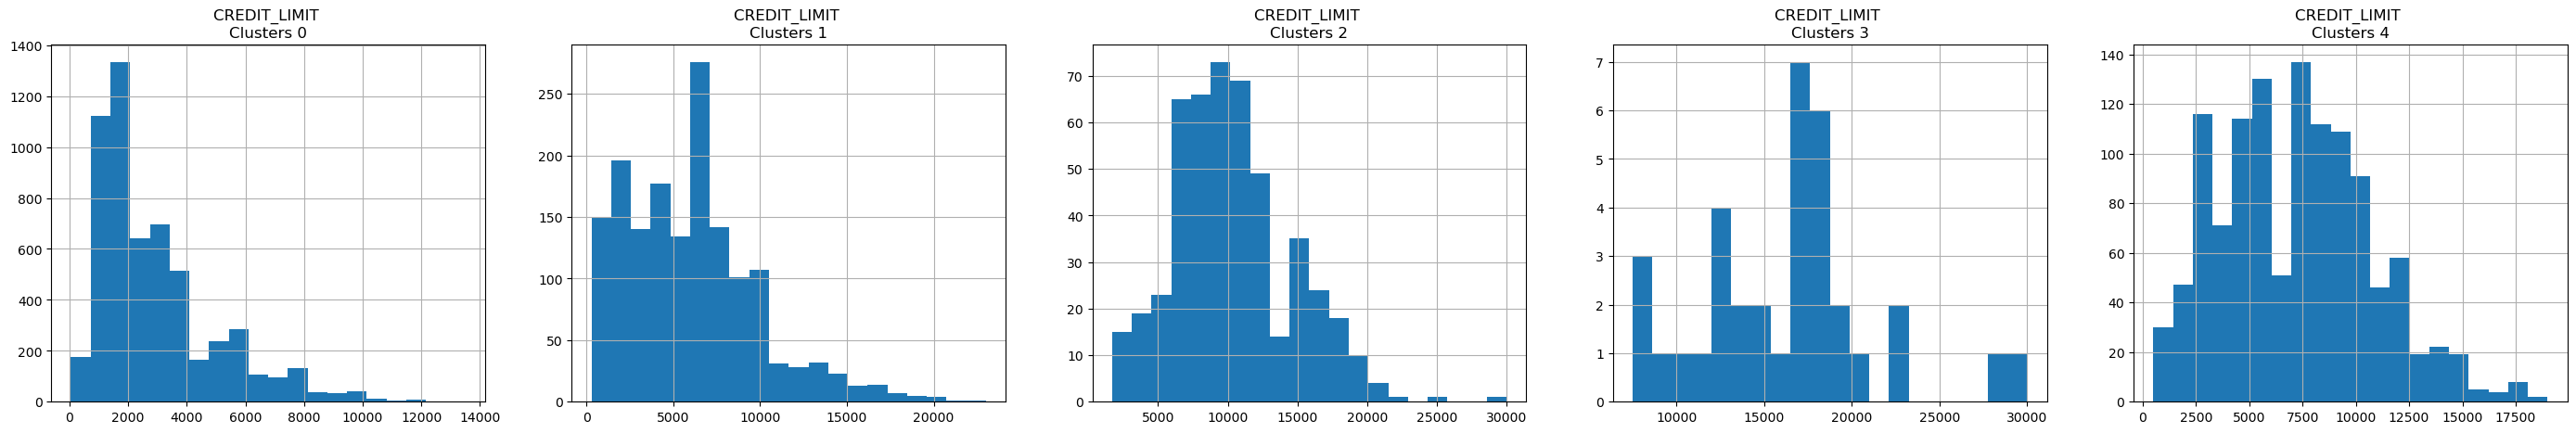

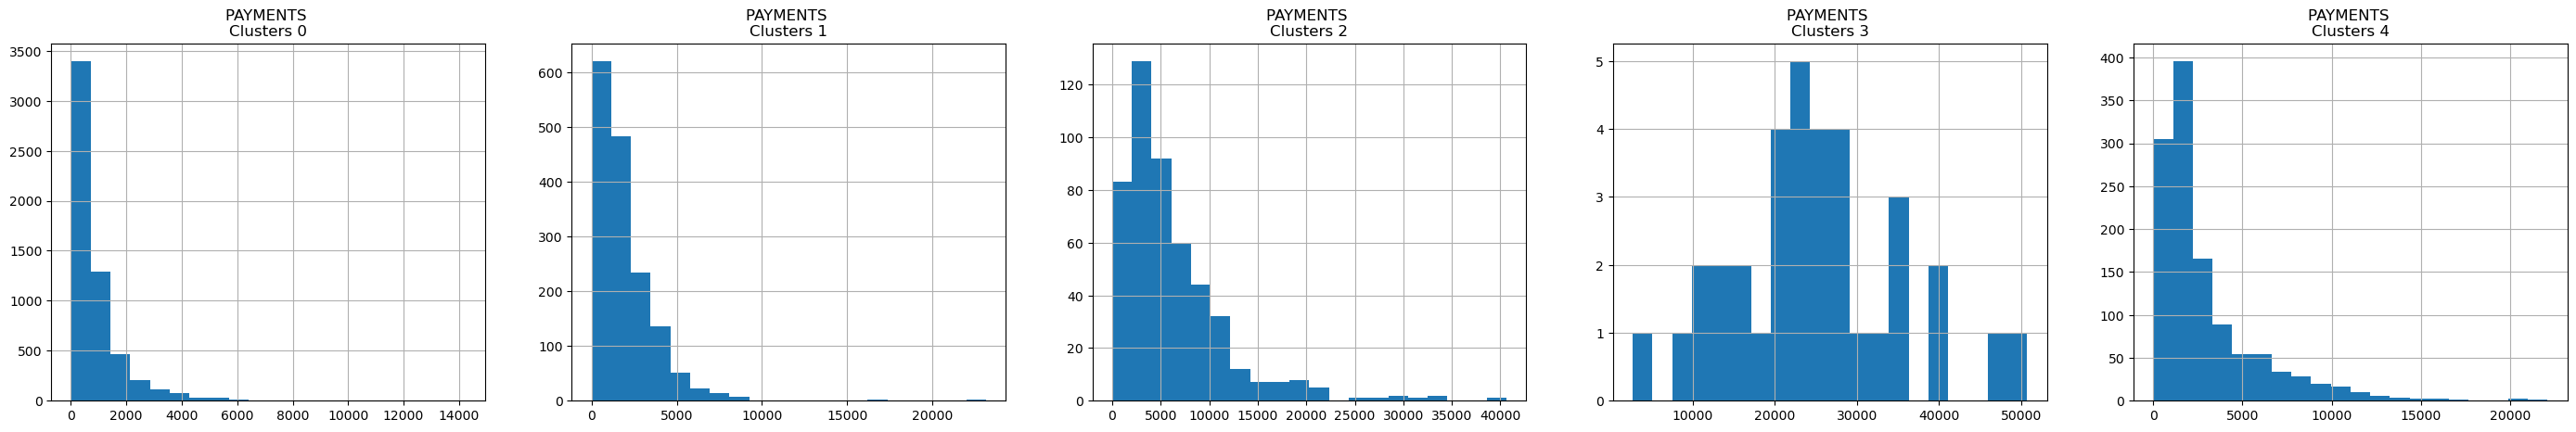

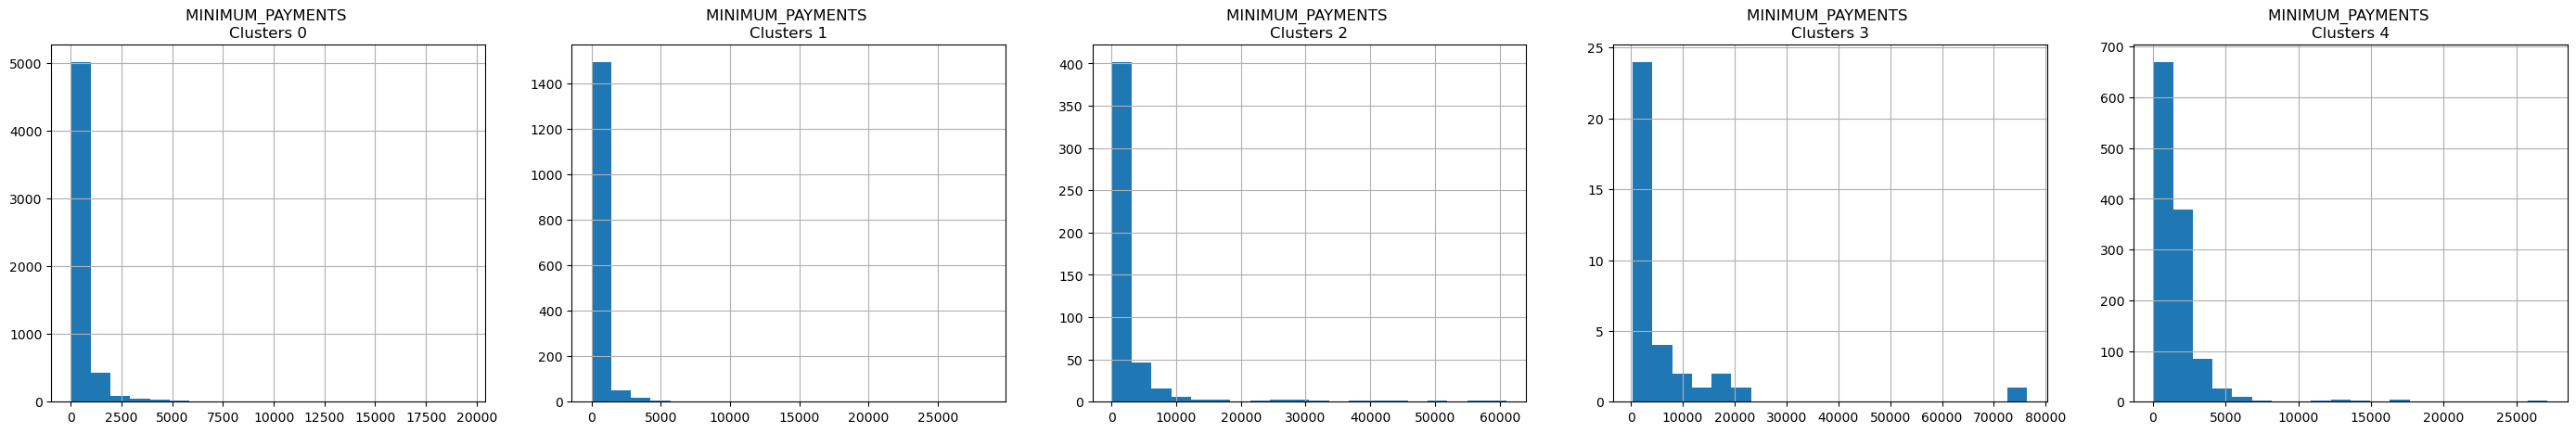

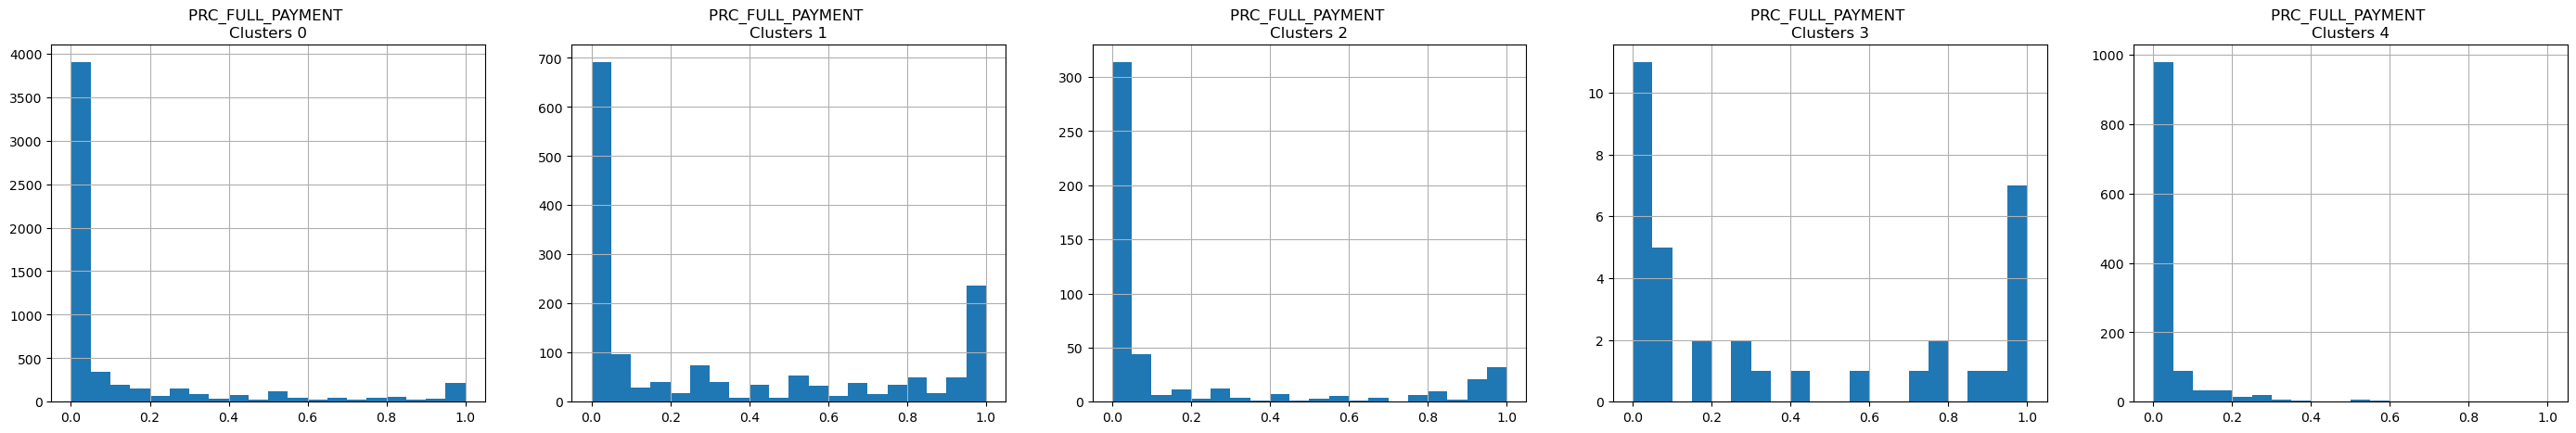

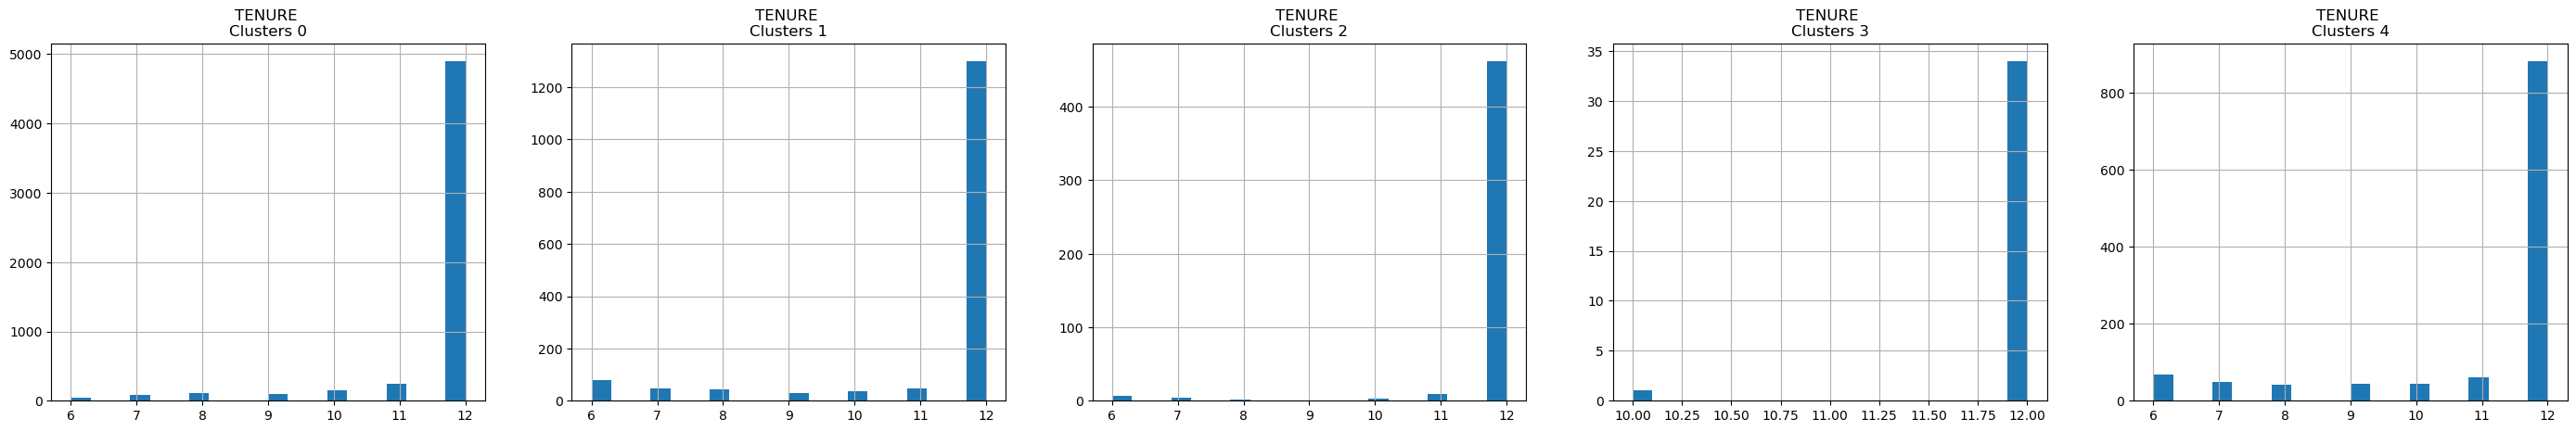

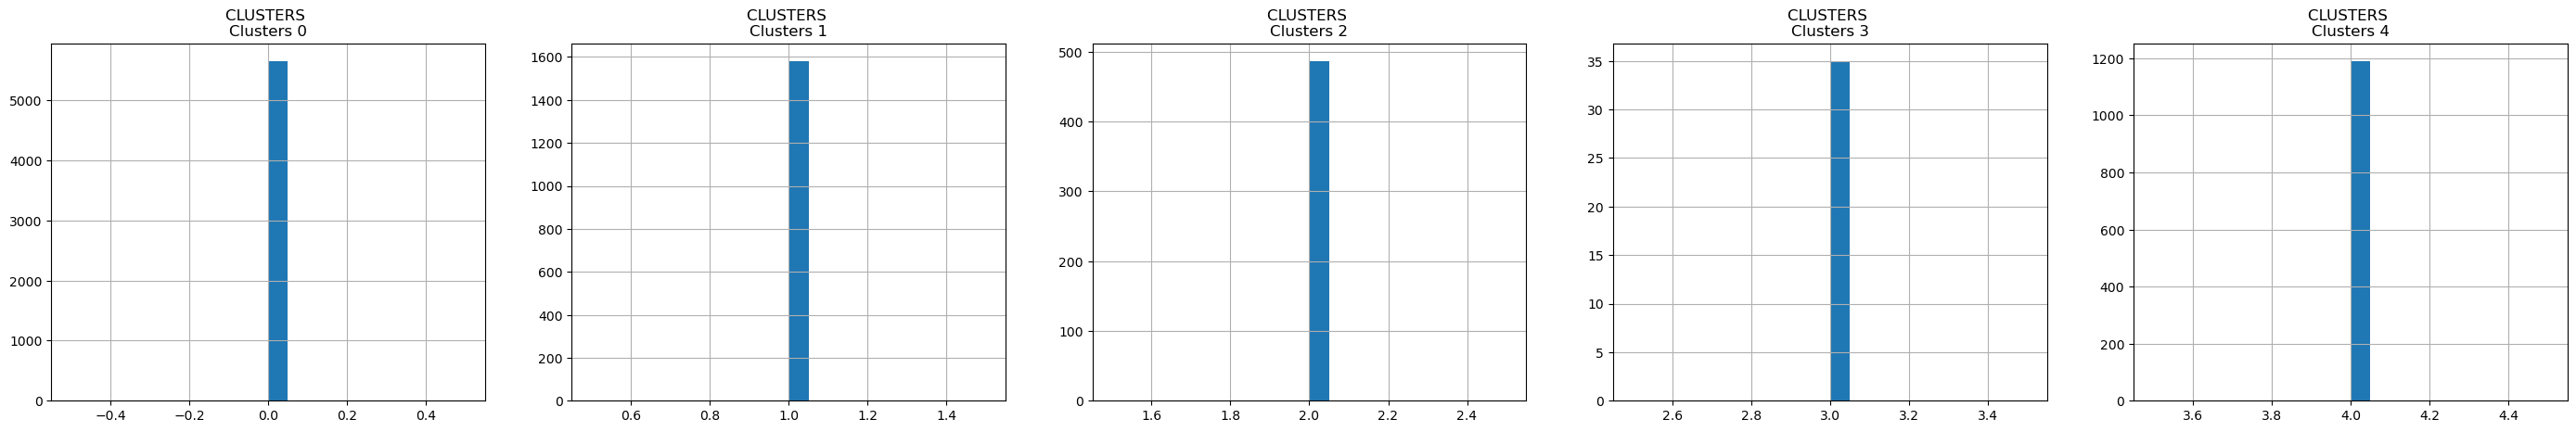

In [36]:
for i in pred_df_clusters.columns:
    plt.figure(figsize = (35, 5))
    for j in range(5):
        plt.subplot(1, 5, j+1)
        cluster = pred_df_clusters[pred_df_clusters['CLUSTERS'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nClusters {}'.format(i,j))
plt.show()

#### PCA

In [37]:
# Obtain the principal components
pca = PCA(n_components = 2)
pca = pca.fit_transform(pred)
# Concatenate the clusters labels to the dataframe
pca_df = pd.DataFrame(pca, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'clusters': labels})], axis = 1)

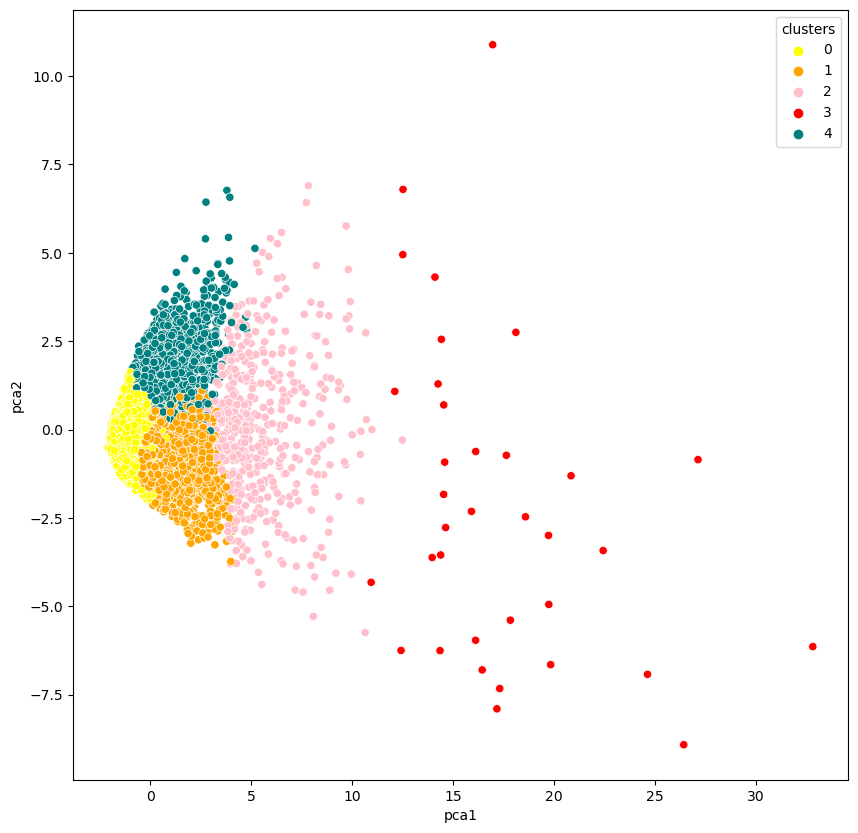

In [38]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'clusters', data = pca_df, 
                     palette = ['yellow', 'orange', 'pink', 'red', 'teal'])